# PRUEBA DE DIFERENTES MODELOS YOLO PARA DETECCIÓN OBJETOS

### PABLO GASCÓ LLOPIS

### DESCARGA DE LIBRERÍAS

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

### IMPORTACIÓN LIBRERÍAS

In [ ]:
from ultralytics import YOLO

import os

import zipfile
from google.colab import files

import matplotlib.pyplot as plt
import pandas as pd
import time
import cv2

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### IMPORTACIÓN DE DATOS

In [ ]:
uploaded = files.upload()

Saving dataset.zip to dataset.zip


In [ ]:
with zipfile.ZipFile("dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

In [ ]:
import shutil
import os

# Ruta actual
source_folder = "dataset/dataset"

# Ruta destino
target_folder = "dataset"

# Mover todo lo que hay dentro de dataset/dataset a dataset/
for item in os.listdir(source_folder):
    shutil.move(os.path.join(source_folder, item), target_folder)

# Eliminar la carpeta vacía
os.rmdir(source_folder)


## MODELO YOLOv8n


### ENTRENAMIENTO YOLOv8n

In [ ]:
yolo_v8n = YOLO("yolov8n.yaml")

yolo_v8n.train(
    data="dataset/data.yaml",
    epochs=75,
    imgsz=640,
    batch=16,
    project="comparativa_yolo",
    name="yolov8n",
    exist_ok=True
)


Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=75, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, p

100%|██████████| 755k/755k [00:00<00:00, 54.0MB/s]

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 12                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1     37248  ultralytics.nn.modules.block.C2f             [192, 64, 1]                  
 16                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  1    123648  ultralytics.nn.modules.block.C2f             [192, 128, 1]                 
 19                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 225MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2415.4±1642.3 MB/s, size: 244.7 KB)


train: Scanning /content/dataset/labels/train... 280 images, 0 backgrounds, 0 corrupt: 100%|██████████| 280/280 [00:00<00:00, 1141.61it/s]

train: New cache created: /content/dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1308.8±939.9 MB/s, size: 216.0 KB)


val: Scanning /content/dataset/labels/val... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<00:00, 915.94it/s]

val: New cache created: /content/dataset/labels/val.cache


Plotting labels to comparativa_yolo/yolov8n/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to comparativa_yolo/yolov8n
Starting training for 75 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/75      2.12G      4.618      4.843      4.273         44        640: 100%|██████████| 18/18 [00:08<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]

                   all         80        518          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/75      2.34G      4.352      4.268      4.146         97        640: 100%|██████████| 18/18 [00:04<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]

                   all         80        518          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/75      2.37G      3.932      3.738      3.905        104        640: 100%|██████████| 18/18 [00:05<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all         80        518          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/75      2.38G      3.547      3.316      3.615         66        640: 100%|██████████| 18/18 [00:04<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         80        518          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/75       2.4G      3.155      2.868      3.312         89        640: 100%|██████████| 18/18 [00:04<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all         80        518          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/75      2.42G      2.964      2.734      3.051         82        640: 100%|██████████| 18/18 [00:04<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]

                   all         80        518    0.00044      0.018    0.00615    0.00115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/75      2.43G      2.747      2.526      2.841        144        640: 100%|██████████| 18/18 [00:04<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]

                   all         80        518       0.89     0.0486     0.0617     0.0273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/75      2.45G      2.574      2.346      2.712         86        640: 100%|██████████| 18/18 [00:04<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]

                   all         80        518      0.411       0.25      0.224     0.0926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/75      2.47G      2.418      2.187      2.586         92        640: 100%|██████████| 18/18 [00:04<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]

                   all         80        518      0.451      0.288      0.325      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/75      2.48G      2.338        2.1      2.442         88        640: 100%|██████████| 18/18 [00:04<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.41it/s]

                   all         80        518      0.458      0.461      0.458        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/75       2.5G      2.212      1.961      2.334         77        640: 100%|██████████| 18/18 [00:04<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         80        518      0.507      0.519        0.5      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/75      2.52G      2.169      1.926      2.306         91        640: 100%|██████████| 18/18 [00:06<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all         80        518      0.556      0.531      0.573      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/75      2.54G      2.087      1.821       2.17         66        640: 100%|██████████| 18/18 [00:04<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]

                   all         80        518      0.624       0.56      0.574      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/75      2.55G      2.026      1.764      2.142         86        640: 100%|██████████| 18/18 [00:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]

                   all         80        518      0.689      0.597      0.654      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/75      2.57G      1.971      1.704      2.076        106        640: 100%|██████████| 18/18 [00:04<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]

                   all         80        518      0.734      0.611      0.694      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/75      2.59G      1.928      1.624      2.017         89        640: 100%|██████████| 18/18 [00:05<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all         80        518      0.687      0.624      0.698      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/75       2.6G      1.878      1.591      1.962        101        640: 100%|██████████| 18/18 [00:04<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all         80        518      0.786       0.61      0.695      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/75      2.62G      1.803      1.538      1.934         68        640: 100%|██████████| 18/18 [00:05<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]

                   all         80        518      0.811      0.658      0.761      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/75      2.64G      1.781      1.454      1.865         78        640: 100%|██████████| 18/18 [00:04<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]

                   all         80        518      0.785      0.643      0.732      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/75      2.65G      1.774      1.461      1.862        108        640: 100%|██████████| 18/18 [00:05<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all         80        518      0.795      0.698      0.765      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/75      2.67G      1.705      1.415      1.766         95        640: 100%|██████████| 18/18 [00:04<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all         80        518      0.762      0.718      0.777      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/75      2.69G      1.664      1.435      1.776         81        640: 100%|██████████| 18/18 [00:05<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         80        518      0.836      0.703      0.781      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/75      2.71G      1.667      1.346      1.738        117        640: 100%|██████████| 18/18 [00:04<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         80        518      0.804      0.703       0.78      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/75      2.72G      1.623      1.296      1.699         90        640: 100%|██████████| 18/18 [00:05<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]

                   all         80        518      0.816      0.739       0.81      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/75      2.74G       1.65      1.286      1.707        128        640: 100%|██████████| 18/18 [00:04<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all         80        518      0.875      0.678      0.825       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/75      2.76G      1.612      1.265      1.667        136        640: 100%|██████████| 18/18 [00:05<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         80        518      0.868       0.77      0.849       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/75      2.78G      1.594      1.267      1.668         85        640: 100%|██████████| 18/18 [00:04<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]

                   all         80        518      0.867      0.769      0.854      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/75      2.79G      1.538      1.223      1.638         86        640: 100%|██████████| 18/18 [00:06<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]

                   all         80        518      0.876      0.754      0.853      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/75      2.81G      1.578      1.225      1.635         90        640: 100%|██████████| 18/18 [00:04<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

                   all         80        518      0.862      0.802      0.871      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/75      2.83G      1.539      1.156      1.602         84        640: 100%|██████████| 18/18 [00:05<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         80        518      0.888       0.76      0.858      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/75      2.84G      1.528      1.166      1.589         73        640: 100%|██████████| 18/18 [00:04<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]

                   all         80        518       0.88       0.79      0.865      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/75      2.86G      1.489      1.126      1.554         68        640: 100%|██████████| 18/18 [00:05<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         80        518      0.893      0.797      0.874      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/75      2.88G       1.49      1.106      1.555         90        640: 100%|██████████| 18/18 [00:04<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]

                   all         80        518      0.878      0.798      0.876       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/75      2.89G      1.514      1.124      1.574         94        640: 100%|██████████| 18/18 [00:05<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

                   all         80        518      0.896      0.816      0.896      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/75      2.91G      1.473      1.086        1.5        101        640: 100%|██████████| 18/18 [00:04<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]

                   all         80        518        0.9      0.792      0.891      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/75      2.93G      1.477      1.082      1.506         92        640: 100%|██████████| 18/18 [00:05<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]

                   all         80        518      0.919      0.826      0.898      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/75      2.95G      1.455      1.066      1.517         93        640: 100%|██████████| 18/18 [00:04<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]

                   all         80        518      0.894      0.826      0.889       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/75      2.96G      1.468      1.062      1.504        118        640: 100%|██████████| 18/18 [00:05<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]

                   all         80        518      0.897      0.831      0.894      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/75      2.98G      1.464      1.083      1.519         64        640: 100%|██████████| 18/18 [00:04<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         80        518      0.891      0.824      0.889      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/75         3G      1.443      1.038      1.483        110        640: 100%|██████████| 18/18 [00:05<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all         80        518      0.909      0.838      0.899      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/75      3.01G      1.456      1.027      1.463         82        640: 100%|██████████| 18/18 [00:04<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]

                   all         80        518      0.902      0.849      0.902      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/75      3.03G      1.439      1.038      1.496         85        640: 100%|██████████| 18/18 [00:05<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]

                   all         80        518      0.917      0.836      0.907      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/75      3.05G       1.42      1.022      1.468         80        640: 100%|██████████| 18/18 [00:04<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]

                   all         80        518       0.89      0.823      0.891      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/75      3.06G      1.428      1.025      1.464         97        640: 100%|██████████| 18/18 [00:05<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]


                   all         80        518      0.901      0.836      0.901      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/75      3.08G      1.409      1.008      1.465        122        640: 100%|██████████| 18/18 [00:04<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all         80        518      0.905      0.842      0.904      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/75       3.1G       1.37     0.9822       1.43         86        640: 100%|██████████| 18/18 [00:05<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         80        518      0.924      0.831      0.908      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/75      3.12G        1.4     0.9774      1.437         90        640: 100%|██████████| 18/18 [00:04<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]

                   all         80        518      0.914      0.852      0.912      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/75      3.13G      1.368     0.9982      1.446        116        640: 100%|██████████| 18/18 [00:04<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all         80        518      0.906      0.849      0.912      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/75      3.15G      1.393     0.9601      1.426         91        640: 100%|██████████| 18/18 [00:04<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.55it/s]

                   all         80        518      0.922      0.856      0.911       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/75      3.17G      1.364     0.9757      1.414         90        640: 100%|██████████| 18/18 [00:04<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         80        518      0.914      0.854      0.907       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/75      3.18G      1.393     0.9503      1.439        110        640: 100%|██████████| 18/18 [00:04<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]

                   all         80        518      0.915      0.863      0.916      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/75       3.2G      1.364     0.9491      1.408         92        640: 100%|██████████| 18/18 [00:04<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all         80        518      0.944      0.842      0.924      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/75      3.22G      1.395     0.9805      1.454         75        640: 100%|██████████| 18/18 [00:04<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]

                   all         80        518       0.92      0.877      0.924      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/75      3.24G      1.378     0.9575       1.44         82        640: 100%|██████████| 18/18 [00:04<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]

                   all         80        518      0.915      0.852      0.909      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/75      3.25G      1.361     0.9457       1.41         66        640: 100%|██████████| 18/18 [00:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]

                   all         80        518      0.935      0.845       0.91      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/75      3.27G      1.347     0.9337      1.401         72        640: 100%|██████████| 18/18 [00:04<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all         80        518      0.904      0.848      0.901      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/75      3.29G      1.381     0.9542      1.412        113        640: 100%|██████████| 18/18 [00:05<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]

                   all         80        518      0.924      0.858       0.92      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/75       3.3G      1.379      0.931       1.42        105        640: 100%|██████████| 18/18 [00:04<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all         80        518      0.936      0.862      0.918      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/75      3.32G      1.337     0.9201      1.406         65        640: 100%|██████████| 18/18 [00:05<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]

                   all         80        518       0.92      0.892      0.924       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/75      3.34G      1.322     0.9085      1.396         84        640: 100%|██████████| 18/18 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all         80        518      0.917      0.872      0.923       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/75      3.36G      1.325     0.9137      1.393         99        640: 100%|██████████| 18/18 [00:05<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         80        518       0.92      0.877      0.926      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/75      3.37G      1.293     0.8898      1.377         96        640: 100%|██████████| 18/18 [00:04<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]


                   all         80        518      0.922      0.888      0.926      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/75      3.39G      1.319     0.8964      1.371         85        640: 100%|██████████| 18/18 [00:05<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]

                   all         80        518      0.915       0.87      0.918      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/75      3.41G      1.291     0.8727      1.369         84        640: 100%|██████████| 18/18 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all         80        518      0.945      0.857      0.927      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/75      3.42G      1.315     0.8878      1.379         96        640: 100%|██████████| 18/18 [00:05<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all         80        518      0.929      0.877       0.93      0.584


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/75      3.44G      1.241      0.922      1.363         55        640: 100%|██████████| 18/18 [00:06<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all         80        518      0.918      0.862      0.914       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/75      3.46G      1.236     0.8743       1.34         61        640: 100%|██████████| 18/18 [00:05<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         80        518      0.911      0.846      0.908      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/75      3.47G      1.233      0.846      1.343         33        640: 100%|██████████| 18/18 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all         80        518      0.924      0.872      0.927      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/75      3.49G      1.228     0.8377      1.334         39        640: 100%|██████████| 18/18 [00:05<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all         80        518      0.913      0.897      0.931      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/75      3.51G        1.2     0.8226      1.319         60        640: 100%|██████████| 18/18 [00:04<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]

                   all         80        518      0.937      0.887      0.932      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/75      3.53G      1.203     0.8244      1.314         53        640: 100%|██████████| 18/18 [00:05<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         80        518      0.938      0.879      0.934      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/75      3.54G      1.195     0.8119      1.312         42        640: 100%|██████████| 18/18 [00:04<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all         80        518      0.934      0.884      0.933       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/75      3.56G      1.178     0.8022      1.302         52        640: 100%|██████████| 18/18 [00:05<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all         80        518      0.929      0.894      0.932      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/75      3.58G      1.187     0.8059      1.328         53        640: 100%|██████████| 18/18 [00:04<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all         80        518      0.944      0.893      0.935      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/75      3.59G      1.198     0.8105      1.317         54        640: 100%|██████████| 18/18 [00:05<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]

                   all         80        518      0.944      0.891      0.934      0.586



75 epochs completed in 0.141 hours.
Optimizer stripped from comparativa_yolo/yolov8n/weights/last.pt, 6.2MB
Optimizer stripped from comparativa_yolo/yolov8n/weights/best.pt, 6.2MB

Validating comparativa_yolo/yolov8n/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]


                   all         80        518      0.933      0.882      0.931       0.59
                pelota         45        111      0.972      0.951      0.958      0.637
                  bote         47        108      0.952      0.954      0.985      0.712
               botella         44         92      0.922       0.88      0.929      0.605
                 libro         48        116      0.924      0.833      0.918      0.583
                 pinza         45         91      0.893      0.791      0.866      0.415
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to comparativa_yolo/yolov8n


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7963f57bd6d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

### GRAFICAR MÉTRICAS YOLOv8n

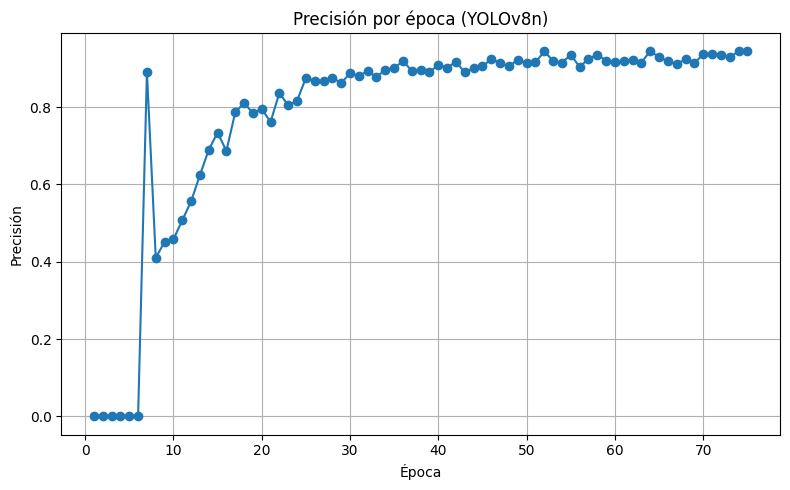

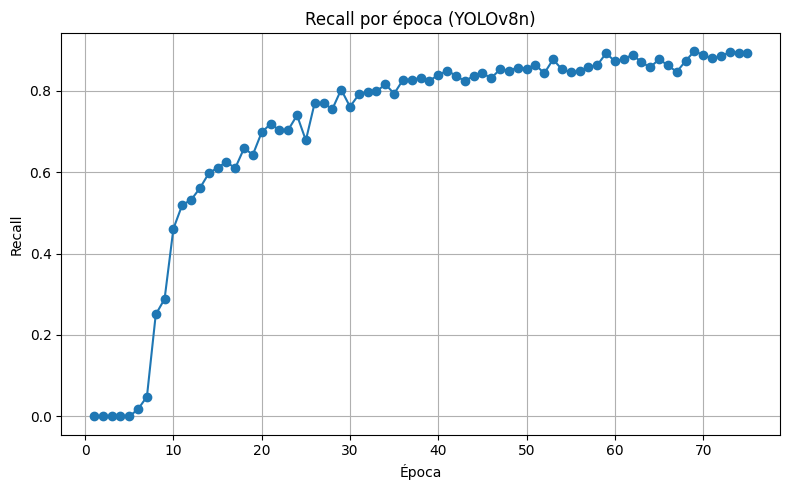

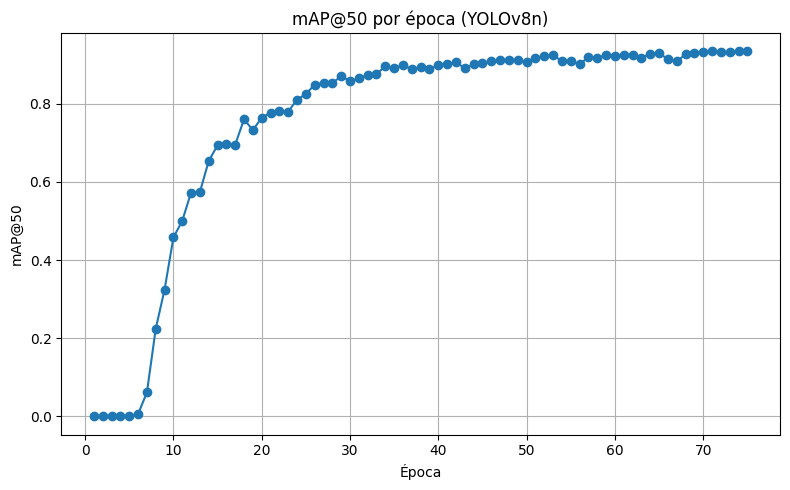

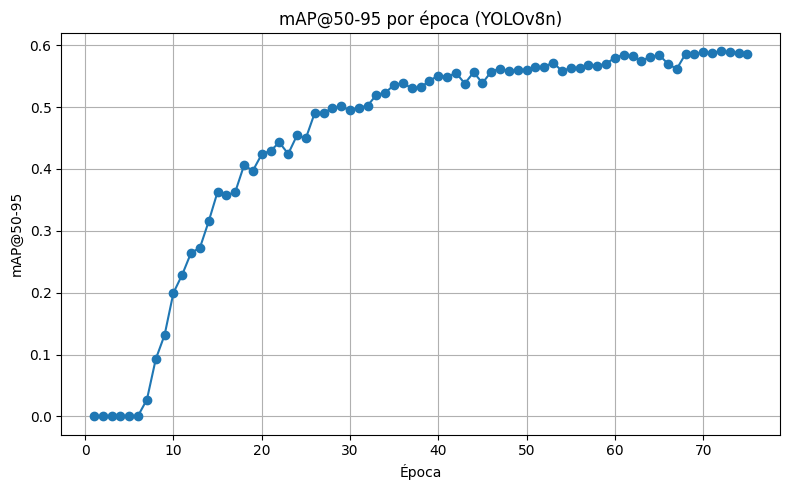

In [ ]:
df = pd.read_csv("comparativa_yolo/yolov8n/results.csv")

# Función para graficar cualquier métrica
def graficar(df, columna, ylabel, titulo, nombre_archivo):
    plt.figure(figsize=(8, 5))
    plt.plot(df['epoch'], df[columna], marker='o', linestyle='-')
    plt.title(titulo)
    plt.xlabel("Época")
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"comparativa_yolo/yolov8n/{nombre_archivo}.png")
    plt.show()

# Graficar cada métrica importante
graficar(df, 'metrics/precision(B)', 'Precisión', 'Precisión por época (YOLOv8n)', 'precision_yolov8n')
graficar(df, 'metrics/recall(B)', 'Recall', 'Recall por época (YOLOv8n)', 'recall_yolov8n')
graficar(df, 'metrics/mAP50(B)', 'mAP@50', 'mAP@50 por época (YOLOv8n)', 'mAP50_yolov8n')
graficar(df, 'metrics/mAP50-95(B)', 'mAP@50-95', 'mAP@50-95 por época (YOLOv8n)', 'mAP50_95_yolov8n')


### CALCULAR TIEMPO DE INFERENCIA MODELO YOLOv8n

In [ ]:
# Cargar el modelo entrenado
yolo_v8n = YOLO("comparativa_yolo/yolov8n/weights/best.pt")

# Ruta al directorio de imágenes de test
test_dir = "dataset/images/test"
image_files = sorted([
    os.path.join(test_dir, f)
    for f in os.listdir(test_dir)
    if f.endswith(".png") or f.endswith(".jpg")
])


N = 1

times = []

for image_path in image_files:
    for _ in range(N):
        start = time.time()
        _ = yolo_v8n.predict(source=image_path, conf=0.4, verbose=False)
        end = time.time()
        times.append(end - start)

# Calcular estadísticas
avg_time = sum(times) / len(times)
fps = 1 / avg_time

print(f"🕒 Tiempo promedio por imagen: {avg_time:.4f} segundos")
print(f"⚡ Velocidad estimada: {fps:.2f} FPS")
print(f"📁 Número total de imágenes procesadas: {len(image_files)}")


🕒 Tiempo promedio por imagen: 0.0263 segundos
⚡ Velocidad estimada: 38.06 FPS
📁 Número total de imágenes procesadas: 40


### EVALUAR MODELO YOLOv8n EN TEST

In [ ]:
# Cargar el modelo entrenado
yolo_v8n = YOLO("comparativa_yolo/yolov8n/weights/best.pt")

# Evaluar rendimiento en test
metrics_yolo_v8n = yolo_v8n.val(data="dataset/data.yaml", split="test")

# Mostrar métricas relevantes
print(f"mAP@0.5: {metrics_yolo_v8n.box.map50:.3f}")
print(f"mAP@0.5:0.95: {metrics_yolo_v8n.box.map:.3f}")
print(f"Precisión: {metrics_yolo_v8n.box.mp:.3f}")
print(f"Recall: {metrics_yolo_v8n.box.mr:.3f}")


Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3239.8±913.0 MB/s, size: 250.8 KB)


val: Scanning /content/dataset/labels/test... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<00:00, 1179.04it/s]

val: New cache created: /content/dataset/labels/test.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]


                   all         40        244      0.928      0.906      0.951      0.628
                pelota         21         41      0.887      0.956      0.964      0.679
                  bote         22         46      0.937      0.913      0.969      0.676
               botella         22         46      0.942      0.957      0.973      0.732
                 libro         28         60      0.979      0.867      0.945      0.597
                 pinza         25         51      0.895      0.838      0.905      0.455
Speed: 12.3ms preprocess, 10.3ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to runs/detect/val
mAP@0.5: 0.951
mAP@0.5:0.95: 0.628
Precisión: 0.928
Recall: 0.906


### VISUALIZAR RESULTADOS MODELO YOLOv8s


image 1/1 /content/dataset/images/test/rgb_100 - copia.png: 480x640 3 botes, 2 botellas, 2 libros, 1 pinza, 7.0ms
Speed: 1.8ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


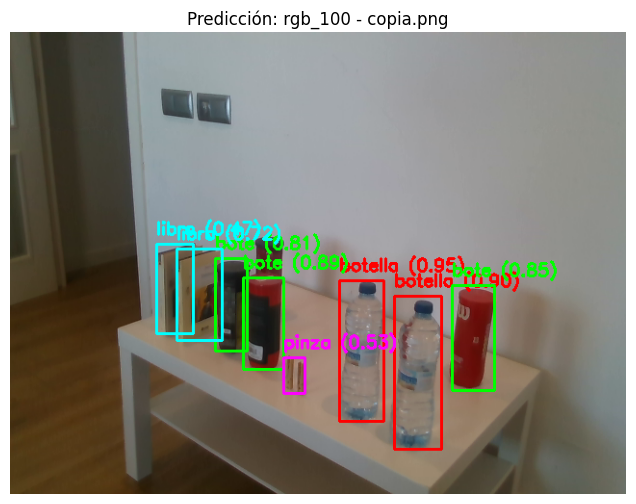


image 1/1 /content/dataset/images/test/rgb_126.png: 480x640 2 pelotas, 2 botes, 1 botella, 2 libros, 9.2ms
Speed: 2.3ms preprocess, 9.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


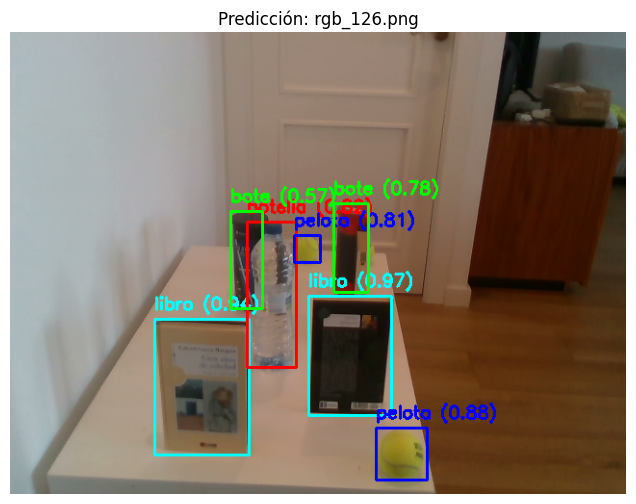


image 1/1 /content/dataset/images/test/rgb_16.png: 480x640 1 pelota, 2 botes, 2 botellas, 2 libros, 2 pinzas, 12.2ms
Speed: 2.1ms preprocess, 12.2ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


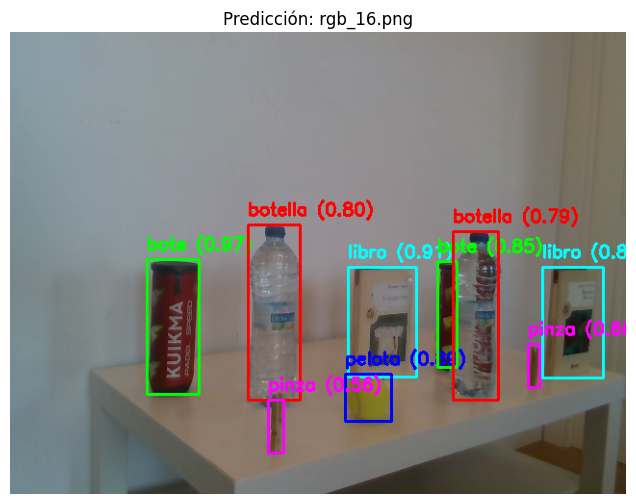


image 1/1 /content/dataset/images/test/rgb_162.png: 480x640 2 pelotas, 2 botes, 2 botellas, 2 pinzas, 9.0ms
Speed: 2.2ms preprocess, 9.0ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 640)


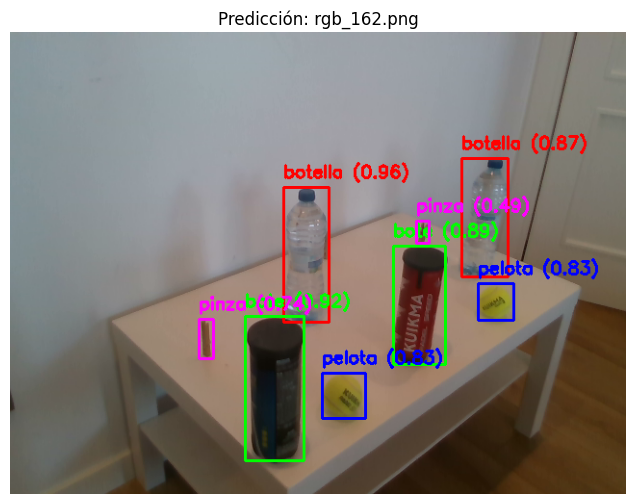


image 1/1 /content/dataset/images/test/rgb_163.png: 480x640 2 pelotas, 2 botes, 2 botellas, 3 pinzas, 10.2ms
Speed: 3.0ms preprocess, 10.2ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


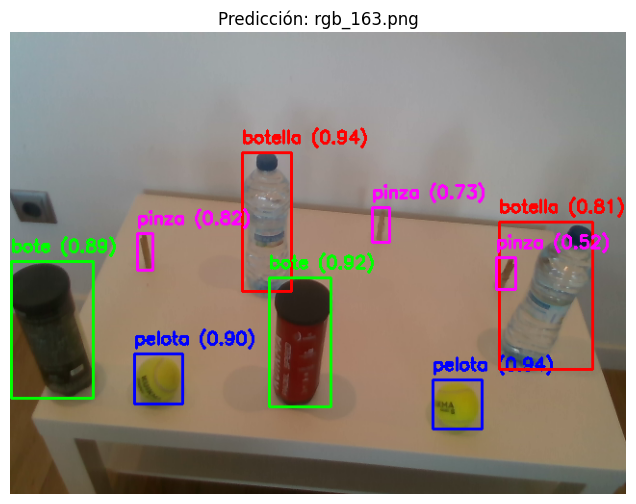

In [ ]:
# Definir colores para cada clase (en BGR para OpenCV)
class_colors = {
    0: (255, 0, 0),    # pelota - azul
    1: (0, 255, 0),    # bote - verde
    2: (0, 0, 255),    # botella - rojo
    3: (255, 255, 0),  # libro - cyan
    4: (255, 0, 255),  # pinza - magenta
}

# Nombres de las clases
class_names = ["pelota", "bote", "botella", "libro", "pinza"]

# Directorio de imágenes de test
test_dir = "dataset/images/test"
image_files = sorted([f for f in os.listdir(test_dir) if f.endswith(".png") or f.endswith(".jpg")])

# Mostrar algunas imágenes con bounding boxes
for file in image_files[:5]:
    path = os.path.join(test_dir, file)
    results = yolo_v8n(path, conf=0.4)[0]

    image = cv2.imread(path)

    for box in results.boxes:
        cls = int(box.cls[0].item())
        conf = box.conf[0].item()
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        color = class_colors.get(cls, (255, 255, 255))
        label = f"{class_names[cls]} ({conf:.2f})"

        # Dibujar caja y texto
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    # Mostrar con matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 6))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title(f"Predicción: {file}")
    plt.show()


# MODELO YOLOv8s

### ENTRENAMIENTO YOLOv8s

In [ ]:
yolo_v8s = YOLO("yolov8s.yaml")

yolo_v8s.train(
    data="dataset/data.yaml",
    epochs=75,
    imgsz=640,
    batch=16,
    project="comparativa_yolo",
    name="yolov8s",
    exist_ok=True
)


Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=75, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, p

train: Scanning /content/dataset/labels/train.cache... 280 images, 0 backgrounds, 0 corrupt: 100%|██████████| 280/280 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 844.2±616.1 MB/s, size: 216.0 KB)


val: Scanning /content/dataset/labels/val.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]


Plotting labels to comparativa_yolo/yolov8s/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to comparativa_yolo/yolov8s
Starting training for 75 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/75      3.93G      4.645      4.727      4.209         44        640: 100%|██████████| 18/18 [00:06<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]

                   all         80        518          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/75      4.51G       4.18      3.813      4.052         97        640: 100%|██████████| 18/18 [00:06<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]

                   all         80        518          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/75      4.51G      3.554      3.078      3.773        104        640: 100%|██████████| 18/18 [00:05<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]

                   all         80        518          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/75      4.51G      3.182       2.78      3.554         66        640: 100%|██████████| 18/18 [00:06<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all         80        518          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/75      4.51G       2.92      2.544      3.279         89        640: 100%|██████████| 18/18 [00:06<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]

                   all         80        518          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/75      4.51G      2.702      2.359       3.01         82        640: 100%|██████████| 18/18 [00:05<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all         80        518          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/75      4.51G      2.495      2.142      2.772        144        640: 100%|██████████| 18/18 [00:06<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all         80        518      0.962      0.126      0.151     0.0671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/75      4.51G      2.332       2.01      2.631         86        640: 100%|██████████| 18/18 [00:05<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]


                   all         80        518      0.379      0.319      0.303       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/75      4.51G      2.187      1.837      2.455         92        640: 100%|██████████| 18/18 [00:05<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all         80        518       0.52      0.467      0.465      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/75      4.51G      2.118       1.75       2.34         88        640: 100%|██████████| 18/18 [00:05<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]

                   all         80        518      0.655      0.541      0.585      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/75      4.51G      2.005       1.66      2.235         77        640: 100%|██████████| 18/18 [00:05<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all         80        518      0.644       0.57       0.62      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/75      4.51G      1.983      1.615      2.181         91        640: 100%|██████████| 18/18 [00:06<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all         80        518      0.728      0.592      0.677      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/75      4.51G      1.901      1.529      2.087         66        640: 100%|██████████| 18/18 [00:05<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]

                   all         80        518      0.685      0.631      0.669      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/75      4.51G       1.85      1.476      2.044         86        640: 100%|██████████| 18/18 [00:06<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]

                   all         80        518      0.738      0.648      0.727      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/75      4.51G      1.796      1.427      1.977        106        640: 100%|██████████| 18/18 [00:05<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]

                   all         80        518      0.753      0.718      0.778      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/75      4.51G       1.74      1.352      1.888         89        640: 100%|██████████| 18/18 [00:05<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]

                   all         80        518      0.804      0.752      0.802      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/75      4.51G       1.68      1.296      1.831        101        640: 100%|██████████| 18/18 [00:06<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all         80        518       0.75      0.692       0.76       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/75      4.51G      1.648       1.28      1.824         68        640: 100%|██████████| 18/18 [00:05<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]

                   all         80        518      0.815      0.754      0.791      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/75      4.51G      1.638      1.237       1.76         78        640: 100%|██████████| 18/18 [00:06<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]

                   all         80        518      0.811      0.777      0.834      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/75      4.51G      1.638      1.231      1.753        108        640: 100%|██████████| 18/18 [00:05<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]

                   all         80        518       0.87      0.754      0.855      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/75      4.52G      1.597      1.195      1.685         95        640: 100%|██████████| 18/18 [00:05<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]

                   all         80        518      0.834      0.803      0.853      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/75      4.53G      1.571      1.189      1.702         81        640: 100%|██████████| 18/18 [00:05<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all         80        518        0.9      0.751      0.865      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/75      4.53G      1.531      1.106       1.64        117        640: 100%|██████████| 18/18 [00:05<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]

                   all         80        518      0.854      0.799       0.86      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/75      4.53G      1.496      1.077      1.608         90        640: 100%|██████████| 18/18 [00:06<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]

                   all         80        518      0.848      0.807      0.857      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/75      4.53G      1.512      1.084      1.618        128        640: 100%|██████████| 18/18 [00:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all         80        518       0.86      0.811      0.891      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/75      4.56G      1.494      1.033      1.573        136        640: 100%|██████████| 18/18 [00:06<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]

                   all         80        518      0.871      0.812      0.878      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/75      4.56G      1.472       1.06      1.583         85        640: 100%|██████████| 18/18 [00:05<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all         80        518      0.887      0.821      0.887      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/75       4.6G      1.429      1.016       1.57         86        640: 100%|██████████| 18/18 [00:06<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]

                   all         80        518      0.938      0.835      0.915      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/75       4.6G      1.462      1.021      1.565         90        640: 100%|██████████| 18/18 [00:05<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]

                   all         80        518      0.884      0.838      0.898      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/75       4.6G      1.442      0.981      1.539         84        640: 100%|██████████| 18/18 [00:05<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all         80        518      0.862      0.835      0.878      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/75       4.6G      1.428     0.9822      1.522         73        640: 100%|██████████| 18/18 [00:06<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]

                   all         80        518      0.896      0.862      0.912      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/75       4.6G      1.392     0.9474       1.49         68        640: 100%|██████████| 18/18 [00:05<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]

                   all         80        518      0.909      0.843      0.918      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/75       4.6G      1.356     0.9291      1.479         90        640: 100%|██████████| 18/18 [00:06<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all         80        518      0.901      0.822      0.893      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/75       4.6G      1.392     0.9381        1.5         94        640: 100%|██████████| 18/18 [00:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all         80        518      0.925      0.849      0.908      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/75       4.6G      1.369     0.9109      1.436        101        640: 100%|██████████| 18/18 [00:05<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]

                   all         80        518      0.907      0.857      0.907      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/75       4.6G      1.364     0.9098      1.442         92        640: 100%|██████████| 18/18 [00:05<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]

                   all         80        518      0.921      0.858      0.917       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/75       4.6G      1.349     0.9012      1.456         93        640: 100%|██████████| 18/18 [00:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]

                   all         80        518      0.922      0.867      0.921      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/75       4.6G      1.347     0.8765      1.426        118        640: 100%|██████████| 18/18 [00:05<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]

                   all         80        518       0.92      0.871       0.93       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/75       4.6G      1.338     0.9017      1.459         64        640: 100%|██████████| 18/18 [00:05<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]

                   all         80        518      0.945      0.881      0.927      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/75       4.6G       1.33     0.8675      1.413        110        640: 100%|██████████| 18/18 [00:06<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         80        518      0.935      0.881      0.923      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/75       4.6G      1.321     0.8558       1.39         82        640: 100%|██████████| 18/18 [00:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]

                   all         80        518      0.938      0.895      0.928      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/75       4.6G      1.327      0.858      1.424         85        640: 100%|██████████| 18/18 [00:06<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         80        518      0.932       0.87      0.929      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/75       4.6G      1.318     0.8355      1.402         80        640: 100%|██████████| 18/18 [00:05<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all         80        518      0.935      0.886      0.932      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/75       4.6G      1.304      0.851      1.391         97        640: 100%|██████████| 18/18 [00:05<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]

                   all         80        518      0.951      0.898      0.932      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/75       4.6G      1.265     0.8156       1.39        122        640: 100%|██████████| 18/18 [00:05<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]

                   all         80        518      0.951      0.867      0.934      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/75       4.6G      1.272     0.8143      1.382         86        640: 100%|██████████| 18/18 [00:05<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all         80        518      0.934      0.875      0.927      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/75       4.6G      1.291     0.8158      1.379         90        640: 100%|██████████| 18/18 [00:05<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]

                   all         80        518      0.944      0.883       0.93      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/75       4.6G      1.254     0.8199      1.388        116        640: 100%|██████████| 18/18 [00:05<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]

                   all         80        518      0.949       0.89      0.933      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/75       4.6G      1.276     0.7918      1.364         91        640: 100%|██████████| 18/18 [00:06<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all         80        518      0.941      0.902      0.941      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/75       4.6G      1.251     0.8034      1.356         90        640: 100%|██████████| 18/18 [00:05<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]

                   all         80        518      0.925      0.873      0.919      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/75       4.6G      1.278     0.7819      1.367        110        640: 100%|██████████| 18/18 [00:05<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all         80        518       0.95      0.909      0.945      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/75       4.6G      1.235     0.7781      1.342         92        640: 100%|██████████| 18/18 [00:05<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]

                   all         80        518       0.96       0.89      0.949      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/75       4.6G      1.262     0.7907      1.382         75        640: 100%|██████████| 18/18 [00:05<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]

                   all         80        518      0.947      0.893      0.936      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/75       4.6G       1.24     0.7715      1.359         82        640: 100%|██████████| 18/18 [00:06<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all         80        518      0.939      0.889      0.933      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/75       4.6G      1.238     0.7612      1.344         66        640: 100%|██████████| 18/18 [00:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all         80        518      0.948      0.902      0.944      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/75       4.6G      1.205     0.7425      1.324         72        640: 100%|██████████| 18/18 [00:06<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all         80        518      0.943      0.892      0.933      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/75       4.6G       1.23     0.7652      1.339        113        640: 100%|██████████| 18/18 [00:05<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all         80        518      0.938      0.891      0.936      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/75       4.6G      1.224     0.7411       1.33        105        640: 100%|██████████| 18/18 [00:06<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]

                   all         80        518      0.937      0.894      0.932      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/75       4.6G      1.187     0.7449      1.322         65        640: 100%|██████████| 18/18 [00:05<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.68it/s]

                   all         80        518      0.934      0.894      0.939      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/75       4.6G      1.181     0.7396       1.31         84        640: 100%|██████████| 18/18 [00:05<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]

                   all         80        518      0.938      0.907      0.938      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/75       4.6G      1.183     0.7405       1.32         99        640: 100%|██████████| 18/18 [00:05<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]

                   all         80        518      0.956      0.903      0.951      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/75       4.6G      1.168     0.7169       1.31         96        640: 100%|██████████| 18/18 [00:05<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]

                   all         80        518      0.955      0.907      0.954      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/75       4.6G      1.161     0.7172      1.282         85        640: 100%|██████████| 18/18 [00:06<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all         80        518      0.963        0.9       0.95      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/75       4.6G      1.163     0.6991      1.294         84        640: 100%|██████████| 18/18 [00:05<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]

                   all         80        518      0.955      0.909      0.949      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/75       4.6G      1.174      0.707      1.301         96        640: 100%|██████████| 18/18 [00:06<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         80        518      0.952      0.905      0.946      0.612


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/75       4.6G      1.109     0.7195      1.287         55        640: 100%|██████████| 18/18 [00:08<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]

                   all         80        518      0.938      0.885      0.924      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/75       4.6G        1.1     0.6901      1.274         61        640: 100%|██████████| 18/18 [00:05<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all         80        518      0.914      0.897      0.932      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/75       4.6G      1.099     0.6662      1.279         33        640: 100%|██████████| 18/18 [00:05<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all         80        518      0.951      0.912      0.954      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/75       4.6G      1.084     0.6618      1.248         39        640: 100%|██████████| 18/18 [00:05<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all         80        518      0.955      0.912      0.953      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/75       4.6G      1.083     0.6509      1.259         60        640: 100%|██████████| 18/18 [00:06<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all         80        518      0.962      0.878      0.942      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/75       4.6G      1.085     0.6543      1.255         53        640: 100%|██████████| 18/18 [00:05<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]

                   all         80        518      0.948      0.902      0.945      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/75       4.6G      1.063     0.6365      1.239         42        640: 100%|██████████| 18/18 [00:06<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all         80        518      0.957      0.908      0.951      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/75       4.6G      1.052     0.6274      1.245         52        640: 100%|██████████| 18/18 [00:05<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         80        518      0.946      0.907       0.95      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/75       4.6G      1.057     0.6296      1.259         53        640: 100%|██████████| 18/18 [00:05<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all         80        518      0.956      0.902      0.955      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/75       4.6G      1.061      0.629      1.248         54        640: 100%|██████████| 18/18 [00:05<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         80        518      0.956      0.905      0.955      0.621



75 epochs completed in 0.156 hours.
Optimizer stripped from comparativa_yolo/yolov8s/weights/last.pt, 22.5MB
Optimizer stripped from comparativa_yolo/yolov8s/weights/best.pt, 22.5MB

Validating comparativa_yolo/yolov8s/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.96it/s]


                   all         80        518      0.958      0.907      0.955       0.62
                pelota         45        111      0.973      0.963      0.975      0.652
                  bote         47        108      0.981      0.935      0.986      0.724
               botella         44         92      0.954      0.896       0.94      0.627
                 libro         48        116      0.943      0.863      0.951      0.646
                 pinza         45         91      0.941      0.877      0.925      0.452
Speed: 0.2ms preprocess, 3.8ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to comparativa_yolo/yolov8s


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79646c11a950>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

### GRAFICAR MÉTRICAS YOLOv8s

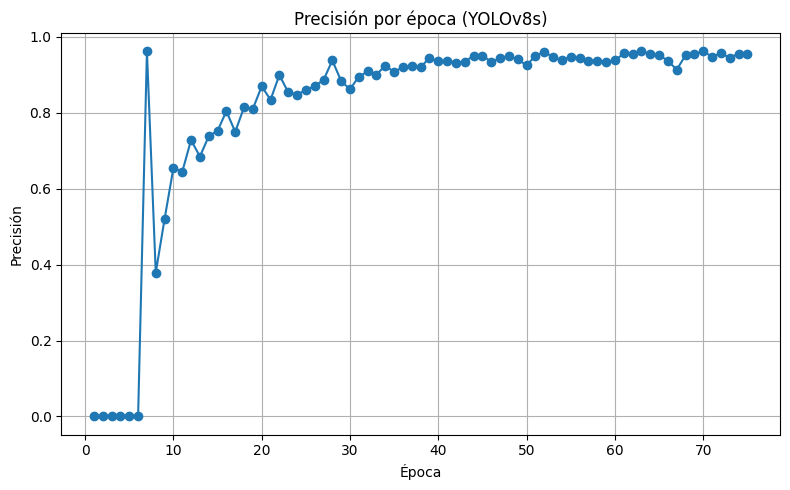

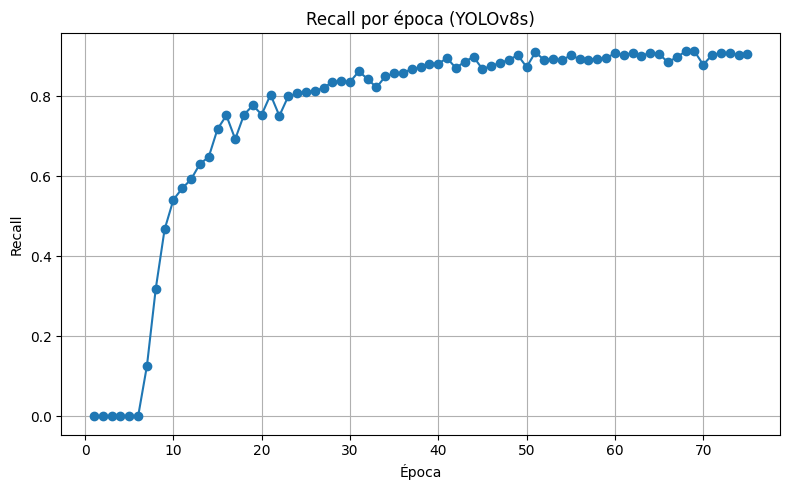

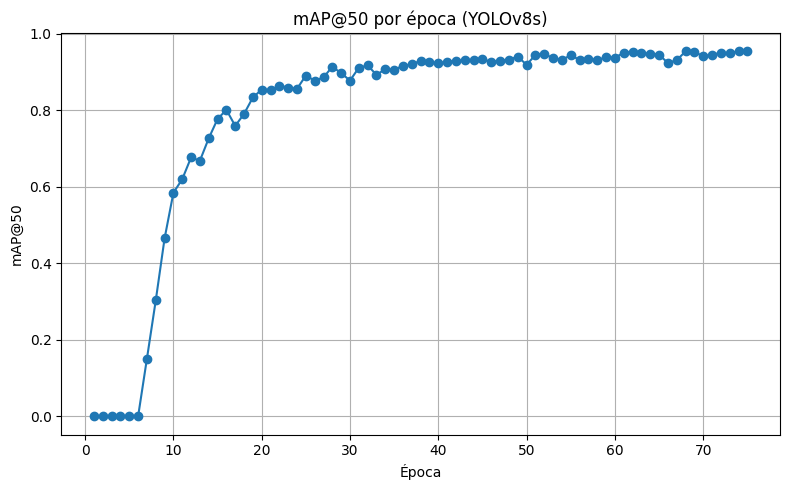

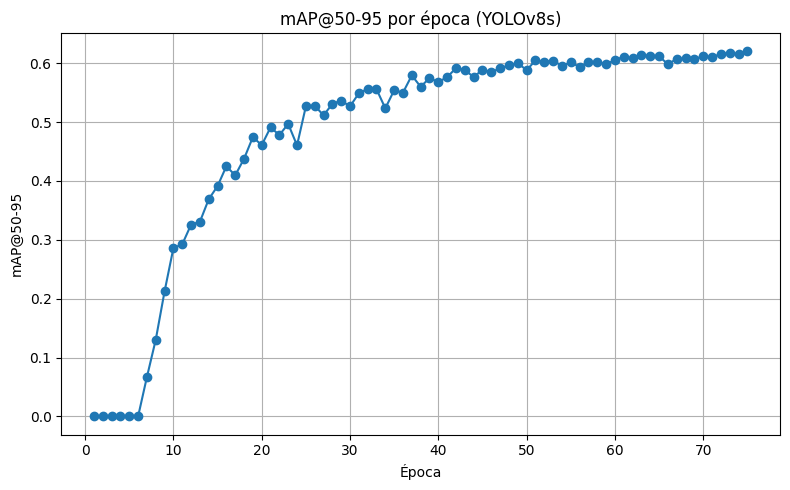

In [ ]:
df = pd.read_csv("comparativa_yolo/yolov8s/results.csv")

# Función para graficar cualquier métrica
def graficar(df, columna, ylabel, titulo, nombre_archivo):
    plt.figure(figsize=(8, 5))
    plt.plot(df['epoch'], df[columna], marker='o', linestyle='-')
    plt.title(titulo)
    plt.xlabel("Época")
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"comparativa_yolo/yolov8s/{nombre_archivo}.png")
    plt.show()

# Graficar cada métrica importante
graficar(df, 'metrics/precision(B)', 'Precisión', 'Precisión por época (YOLOv8s)', 'precision_yolov8s')
graficar(df, 'metrics/recall(B)', 'Recall', 'Recall por época (YOLOv8s)', 'recall_yolov8s')
graficar(df, 'metrics/mAP50(B)', 'mAP@50', 'mAP@50 por época (YOLOv8s)', 'mAP50_yolov8s')
graficar(df, 'metrics/mAP50-95(B)', 'mAP@50-95', 'mAP@50-95 por época (YOLOv8s)', 'mAP50_95_yolov8s')


### CALCULAR TIEMPO DE INFERENCIA MODELO YOLOv8s

In [ ]:
# Cargar el modelo entrenado
yolo_v8s = YOLO("comparativa_yolo/yolov8s/weights/best.pt")

# Ruta al directorio de imágenes de test
test_dir = "dataset/images/test"
image_files = sorted([
    os.path.join(test_dir, f)
    for f in os.listdir(test_dir)
    if f.endswith(".png") or f.endswith(".jpg")
])

N = 1

times = []

for image_path in image_files:
    for _ in range(N):
        start = time.time()
        _ = yolo_v8s.predict(source=image_path, conf=0.4, verbose=False)
        end = time.time()
        times.append(end - start)

# Calcular estadísticas
avg_time = sum(times) / len(times)
fps = 1 / avg_time

print(f"🕒 Tiempo promedio por imagen: {avg_time:.4f} segundos")
print(f"⚡ Velocidad estimada: {fps:.2f} FPS")
print(f"📁 Número total de imágenes procesadas: {len(image_files)}")


🕒 Tiempo promedio por imagen: 0.0242 segundos
⚡ Velocidad estimada: 41.37 FPS
📁 Número total de imágenes procesadas: 40


### EVALUAR MODELO YOLOv8s EN TEST

In [ ]:
# Cargar el modelo entrenado
yolo_v8s = YOLO("comparativa_yolo/yolov8s/weights/best.pt")

# Evaluar rendimiento en test
metrics_yolo_v8s = yolo_v8s.val(data="dataset/data.yaml", split="test")

# Mostrar métricas relevantes
print(f"mAP@0.5: {metrics_yolo_v8s.box.map50:.3f}")
print(f"mAP@0.5:0.95: {metrics_yolo_v8s.box.map:.3f}")
print(f"Precisión: {metrics_yolo_v8s.box.mp:.3f}")
print(f"Recall: {metrics_yolo_v8s.box.mr:.3f}")


Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2612.0±1514.4 MB/s, size: 250.8 KB)


val: Scanning /content/dataset/labels/test.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]


                   all         40        244       0.95      0.911      0.971       0.65
                pelota         21         41      0.869      0.976      0.969      0.696
                  bote         22         46          1      0.929      0.968      0.722
               botella         22         46      0.945      0.978      0.989      0.727
                 libro         28         60      0.937       0.85      0.954      0.652
                 pinza         25         51          1      0.823      0.973      0.452
Speed: 10.0ms preprocess, 16.1ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs/detect/val2
mAP@0.5: 0.971
mAP@0.5:0.95: 0.650
Precisión: 0.950
Recall: 0.911


### VISUALIZAR RESULTADOS MODELO YOLOv8s


image 1/1 /content/dataset/images/test/rgb_100 - copia.png: 480x640 5 botes, 2 botellas, 2 libros, 1 pinza, 13.8ms
Speed: 1.8ms preprocess, 13.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


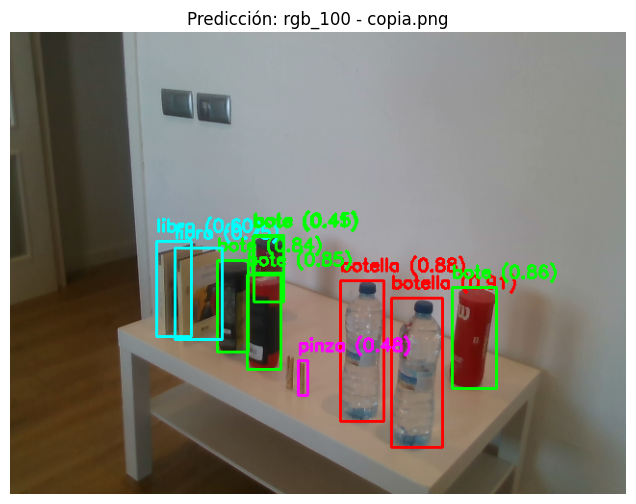


image 1/1 /content/dataset/images/test/rgb_126.png: 480x640 3 pelotas, 2 botes, 1 botella, 2 libros, 12.9ms
Speed: 2.4ms preprocess, 12.9ms inference, 3.3ms postprocess per image at shape (1, 3, 480, 640)


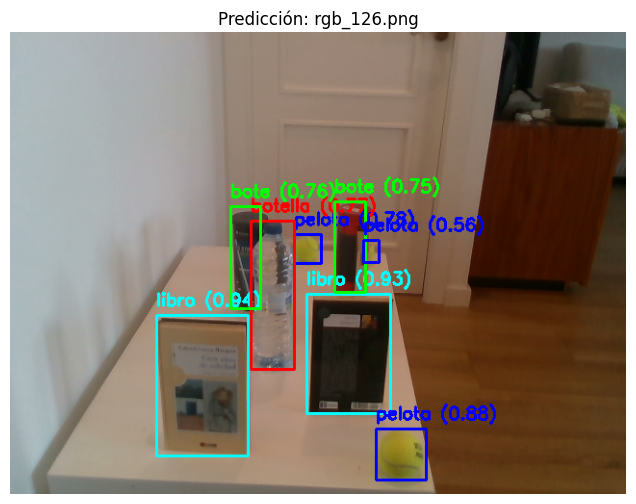


image 1/1 /content/dataset/images/test/rgb_16.png: 480x640 1 pelota, 2 botes, 2 botellas, 2 libros, 2 pinzas, 12.9ms
Speed: 1.9ms preprocess, 12.9ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


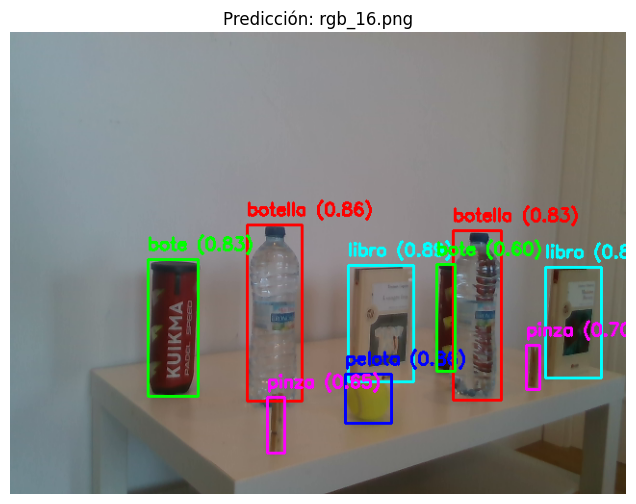


image 1/1 /content/dataset/images/test/rgb_162.png: 480x640 2 pelotas, 2 botes, 2 botellas, 2 pinzas, 13.0ms
Speed: 2.8ms preprocess, 13.0ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


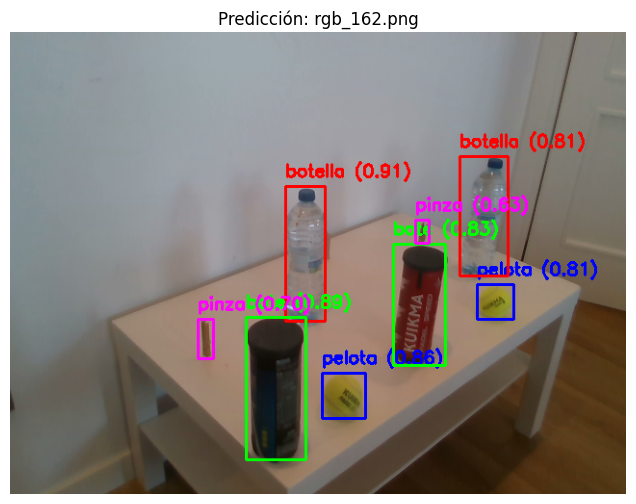


image 1/1 /content/dataset/images/test/rgb_163.png: 480x640 2 pelotas, 2 botes, 2 botellas, 3 pinzas, 13.0ms
Speed: 2.2ms preprocess, 13.0ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


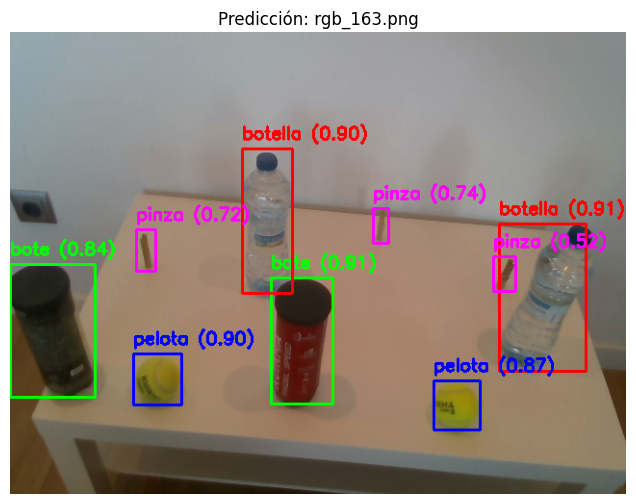

In [ ]:
# Definir colores para cada clase (en BGR para OpenCV)
class_colors = {
    0: (255, 0, 0),    # pelota - azul
    1: (0, 255, 0),    # bote - verde
    2: (0, 0, 255),    # botella - rojo
    3: (255, 255, 0),  # libro - cyan
    4: (255, 0, 255),  # pinza - magenta
}

# Nombres de las clases
class_names = ["pelota", "bote", "botella", "libro", "pinza"]

# Directorio de imágenes de test
test_dir = "dataset/images/test"
image_files = sorted([f for f in os.listdir(test_dir) if f.endswith(".png") or f.endswith(".jpg")])

# Mostrar algunas imágenes con bounding boxes
for file in image_files[:5]:
    path = os.path.join(test_dir, file)
    results = yolo_v8s(path, conf=0.4)[0]

    image = cv2.imread(path)

    for box in results.boxes:
        cls = int(box.cls[0].item())
        conf = box.conf[0].item()
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        color = class_colors.get(cls, (255, 255, 255))
        label = f"{class_names[cls]} ({conf:.2f})"

        # Dibujar caja y texto
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    # Mostrar con matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 6))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title(f"Predicción: {file}")
    plt.show()



# MODELO YOLOv8m

### ENTRENAMIENTO YOLOv8m

In [ ]:
yolo_v8m = YOLO("yolov8m.yaml")

yolo_v8m.train(
    data="dataset/data.yaml",
    epochs=75,
    imgsz=640,
    batch=16,
    project="comparativa_yolo",
    name="yolov8m",
    exist_ok=True
)


Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=75, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8m, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, p

train: Scanning /content/dataset/labels/train.cache... 280 images, 0 backgrounds, 0 corrupt: 100%|██████████| 280/280 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 795.7±840.5 MB/s, size: 216.0 KB)


val: Scanning /content/dataset/labels/val.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]


Plotting labels to comparativa_yolo/yolov8m/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to comparativa_yolo/yolov8m
Starting training for 75 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/75      6.35G      4.598      4.618      4.189         44        640: 100%|██████████| 18/18 [00:10<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]

                   all         80        518          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/75      7.21G      3.967      3.487      3.757         97        640: 100%|██████████| 18/18 [00:09<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         80        518          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/75      7.24G      3.373      3.001      3.429        104        640: 100%|██████████| 18/18 [00:10<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         80        518          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/75      7.24G      3.017      2.704      3.184         66        640: 100%|██████████| 18/18 [00:09<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]

                   all         80        518          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/75      7.24G      2.639      2.538      2.904         89        640: 100%|██████████| 18/18 [00:09<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]

                   all         80        518          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/75       7.3G      2.576      2.394      2.715         82        640: 100%|██████████| 18/18 [00:09<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]

                   all         80        518    0.00217     0.0742     0.0178    0.00464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/75       7.3G      2.367      2.098      2.555        144        640: 100%|██████████| 18/18 [00:09<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all         80        518      0.432      0.118      0.143     0.0577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/75      7.37G      2.247      1.936      2.471         86        640: 100%|██████████| 18/18 [00:09<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         80        518      0.619      0.376      0.434      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/75       6.6G      2.126      1.765      2.366         92        640: 100%|██████████| 18/18 [00:09<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         80        518      0.523      0.486      0.448      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/75      6.99G       2.03      1.728      2.243         88        640: 100%|██████████| 18/18 [00:09<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         80        518      0.709      0.612       0.66      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/75      6.99G      1.961      1.569      2.182         77        640: 100%|██████████| 18/18 [00:09<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all         80        518      0.816      0.566      0.675      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/75      7.06G      1.943      1.559      2.155         91        640: 100%|██████████| 18/18 [00:09<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         80        518      0.819      0.604       0.71      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/75      7.12G      1.934      1.504      2.107         66        640: 100%|██████████| 18/18 [00:09<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         80        518      0.713      0.721      0.732      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/75      7.12G      1.758      1.404       1.99         86        640: 100%|██████████| 18/18 [00:09<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]

                   all         80        518       0.73      0.716      0.794      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/75      7.19G      1.757      1.361      1.953        106        640: 100%|██████████| 18/18 [00:09<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         80        518      0.821      0.707      0.802      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/75      7.26G      1.699      1.292      1.879         89        640: 100%|██████████| 18/18 [00:09<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all         80        518      0.828      0.748      0.833       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/75      7.26G      1.631      1.238      1.816        101        640: 100%|██████████| 18/18 [00:09<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         80        518      0.829      0.756      0.831      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/75      7.32G      1.612      1.213       1.81         68        640: 100%|██████████| 18/18 [00:09<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         80        518      0.856      0.776      0.859      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/75      7.39G      1.587       1.19      1.738         78        640: 100%|██████████| 18/18 [00:09<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         80        518      0.876      0.771      0.849      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/75       6.6G      1.605      1.176      1.752        108        640: 100%|██████████| 18/18 [00:09<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all         80        518      0.856      0.763      0.854      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/75       6.6G      1.513      1.102      1.651         95        640: 100%|██████████| 18/18 [00:09<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         80        518      0.874      0.805      0.865      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/75       6.6G      1.498      1.087      1.671         81        640: 100%|██████████| 18/18 [00:09<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]

                   all         80        518      0.861      0.821      0.884      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/75       6.6G      1.481      1.034      1.631        117        640: 100%|██████████| 18/18 [00:09<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         80        518      0.899      0.811      0.899      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/75      7.02G      1.431     0.9958      1.576         90        640: 100%|██████████| 18/18 [00:09<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         80        518      0.913      0.803      0.892      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/75      7.02G      1.469      1.021      1.605        128        640: 100%|██████████| 18/18 [00:09<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all         80        518      0.889      0.805      0.878      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/75      7.09G      1.467     0.9779      1.575        136        640: 100%|██████████| 18/18 [00:09<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all         80        518      0.877      0.823      0.887      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/75      7.16G      1.437      1.019      1.588         85        640: 100%|██████████| 18/18 [00:09<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]

                   all         80        518      0.878      0.816      0.883      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/75      7.16G      1.403     0.9683      1.562         86        640: 100%|██████████| 18/18 [00:09<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]

                   all         80        518      0.929      0.842      0.899      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/75      7.22G      1.405     0.9461      1.551         90        640: 100%|██████████| 18/18 [00:09<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]

                   all         80        518      0.937       0.84      0.914      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/75      7.23G      1.347     0.8831        1.5         84        640: 100%|██████████| 18/18 [00:09<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         80        518      0.909      0.847       0.92      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/75      7.23G      1.364     0.8998      1.496         73        640: 100%|██████████| 18/18 [00:09<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all         80        518       0.92      0.831      0.913      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/75      7.23G      1.348     0.8732      1.485         68        640: 100%|██████████| 18/18 [00:09<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]

                   all         80        518      0.891      0.873      0.921      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/75      7.23G      1.314     0.8525      1.475         90        640: 100%|██████████| 18/18 [00:09<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         80        518      0.918      0.856      0.928      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/75      7.23G      1.338     0.8646       1.48         94        640: 100%|██████████| 18/18 [00:09<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]

                   all         80        518      0.923      0.869       0.93      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/75      7.23G      1.299     0.8192      1.415        101        640: 100%|██████████| 18/18 [00:09<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all         80        518      0.922      0.868      0.921      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/75      7.23G      1.298     0.8394      1.421         92        640: 100%|██████████| 18/18 [00:09<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all         80        518      0.907      0.879      0.932      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/75      7.23G      1.273     0.8139      1.427         93        640: 100%|██████████| 18/18 [00:09<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         80        518      0.939      0.881       0.93      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/75      7.23G      1.265     0.7891      1.391        118        640: 100%|██████████| 18/18 [00:09<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         80        518      0.942      0.855      0.929      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/75      7.23G      1.324     0.8332      1.466         64        640: 100%|██████████| 18/18 [00:09<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]

                   all         80        518       0.95      0.893      0.934      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/75      7.29G      1.279     0.7912      1.402        110        640: 100%|██████████| 18/18 [00:09<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         80        518      0.922      0.887      0.938      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/75      7.29G      1.257     0.7747      1.372         82        640: 100%|██████████| 18/18 [00:09<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         80        518      0.927      0.903       0.94      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/75      7.29G      1.277     0.7843      1.405         85        640: 100%|██████████| 18/18 [00:09<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         80        518      0.948      0.879      0.928      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/75      7.29G      1.272     0.7746      1.397         80        640: 100%|██████████| 18/18 [00:09<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all         80        518      0.935      0.906      0.941      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/75      7.29G       1.28      0.787      1.398         97        640: 100%|██████████| 18/18 [00:09<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         80        518      0.939      0.876      0.924      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/75      7.29G      1.224      0.753      1.377        122        640: 100%|██████████| 18/18 [00:09<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all         80        518       0.95      0.858      0.926        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/75      7.29G      1.229     0.7417      1.369         86        640: 100%|██████████| 18/18 [00:09<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]

                   all         80        518      0.946      0.895       0.94      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/75      7.29G      1.218     0.7381      1.351         90        640: 100%|██████████| 18/18 [00:09<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         80        518      0.943      0.907      0.948       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/75      7.29G      1.237     0.7286      1.391        116        640: 100%|██████████| 18/18 [00:09<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]

                   all         80        518      0.929      0.908       0.95      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/75      7.29G      1.221     0.7225      1.349         91        640: 100%|██████████| 18/18 [00:09<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         80        518      0.943      0.911      0.949      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/75      7.29G      1.191     0.7253      1.335         90        640: 100%|██████████| 18/18 [00:09<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.00it/s]

                   all         80        518      0.921      0.904      0.945      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/75      7.29G      1.202     0.7002      1.332        110        640: 100%|██████████| 18/18 [00:09<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         80        518      0.946      0.896      0.952      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/75      7.29G      1.171     0.6962      1.319         92        640: 100%|██████████| 18/18 [00:09<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]

                   all         80        518      0.952      0.896       0.95      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/75      7.29G      1.207     0.7217      1.367         75        640: 100%|██████████| 18/18 [00:09<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         80        518      0.954      0.901      0.951      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/75      7.29G       1.18     0.6969      1.345         82        640: 100%|██████████| 18/18 [00:09<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]

                   all         80        518      0.952      0.914      0.958      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/75      7.29G      1.187     0.6919      1.329         66        640: 100%|██████████| 18/18 [00:09<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]

                   all         80        518      0.953      0.907      0.958      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/75      7.29G      1.144     0.6775      1.301         72        640: 100%|██████████| 18/18 [00:09<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]

                   all         80        518      0.939      0.904      0.953      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/75      7.29G      1.153     0.6799      1.311        113        640: 100%|██████████| 18/18 [00:09<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all         80        518      0.956      0.907      0.956      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/75      7.29G      1.169     0.6762      1.309        105        640: 100%|██████████| 18/18 [00:09<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all         80        518      0.955      0.909      0.956      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/75      7.29G      1.122     0.6551      1.293         65        640: 100%|██████████| 18/18 [00:09<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         80        518      0.952      0.907       0.95      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/75      7.29G      1.138     0.6619      1.303         84        640: 100%|██████████| 18/18 [00:09<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]

                   all         80        518      0.946      0.923      0.962       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/75      7.29G      1.133     0.6577      1.295         99        640: 100%|██████████| 18/18 [00:09<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]

                   all         80        518      0.957      0.919      0.965      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/75      7.29G      1.094     0.6282      1.275         96        640: 100%|██████████| 18/18 [00:09<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]

                   all         80        518      0.947      0.918      0.961      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/75      7.29G      1.106     0.6386      1.261         85        640: 100%|██████████| 18/18 [00:09<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all         80        518      0.951      0.894      0.956      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/75      7.29G      1.099     0.6267       1.27         84        640: 100%|██████████| 18/18 [00:09<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         80        518      0.966      0.891      0.958      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/75      7.29G      1.104     0.6237      1.275         96        640: 100%|██████████| 18/18 [00:09<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all         80        518      0.955      0.908      0.965      0.642


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/75      7.29G      1.061     0.6329      1.287         55        640: 100%|██████████| 18/18 [00:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]

                   all         80        518      0.942      0.912       0.96      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/75      7.29G      1.041     0.6052      1.273         61        640: 100%|██████████| 18/18 [00:09<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         80        518      0.963      0.903      0.961       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/75      7.29G      1.042     0.5894      1.266         33        640: 100%|██████████| 18/18 [00:09<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         80        518      0.961      0.916      0.966      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/75      7.29G      1.029     0.5827      1.236         39        640: 100%|██████████| 18/18 [00:09<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all         80        518      0.949       0.92      0.964      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/75      7.29G      1.019     0.5701      1.248         60        640: 100%|██████████| 18/18 [00:09<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]

                   all         80        518      0.958      0.912      0.961      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/75      7.29G      1.018     0.5713       1.24         53        640: 100%|██████████| 18/18 [00:09<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]

                   all         80        518      0.959      0.918      0.962      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/75      7.29G     0.9956     0.5682      1.228         42        640: 100%|██████████| 18/18 [00:09<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         80        518       0.96      0.918      0.963       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/75      7.29G     0.9989     0.5587      1.241         52        640: 100%|██████████| 18/18 [00:09<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all         80        518      0.951      0.929      0.968      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/75      7.29G     0.9943     0.5594      1.248         53        640: 100%|██████████| 18/18 [00:09<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all         80        518      0.951      0.928      0.967       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/75      7.29G     0.9904     0.5536      1.231         54        640: 100%|██████████| 18/18 [00:09<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         80        518      0.949      0.936      0.969      0.643



75 epochs completed in 0.286 hours.
Optimizer stripped from comparativa_yolo/yolov8m/weights/last.pt, 52.0MB
Optimizer stripped from comparativa_yolo/yolov8m/weights/best.pt, 52.0MB

Validating comparativa_yolo/yolov8m/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m summary (fused): 92 layers, 25,842,655 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.58it/s]


                   all         80        518      0.958      0.912      0.961      0.645
                pelota         45        111      0.995      0.955      0.989      0.664
                  bote         47        108          1      0.927       0.99       0.75
               botella         44         92      0.954      0.898      0.944      0.653
                 libro         48        116      0.954      0.891      0.961      0.658
                 pinza         45         91      0.886       0.89      0.922      0.499
Speed: 0.2ms preprocess, 8.1ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to comparativa_yolo/yolov8m


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79646c9fc8d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

### GRAFICAR MÉTRICAS YOLOv8m

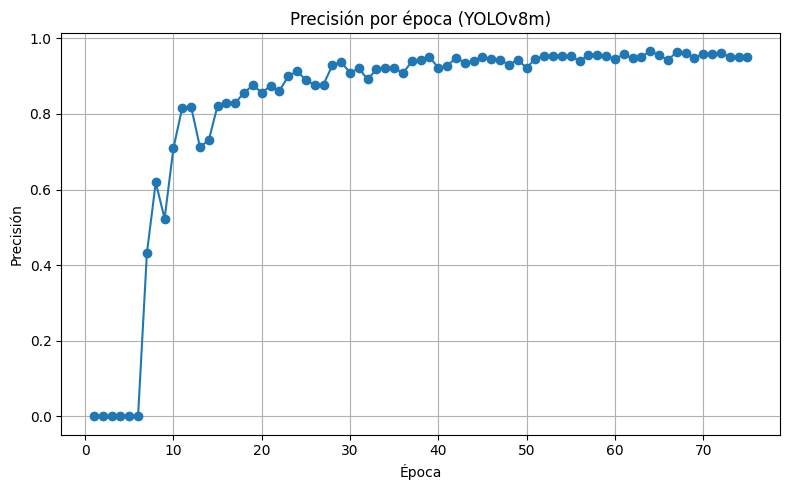

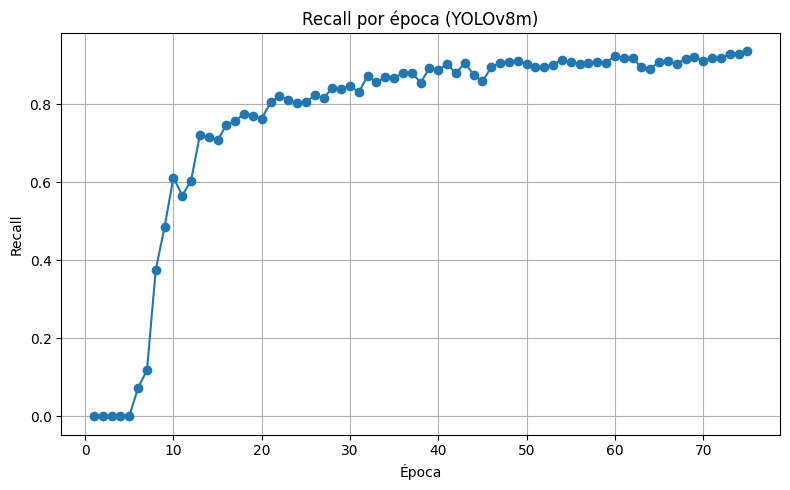

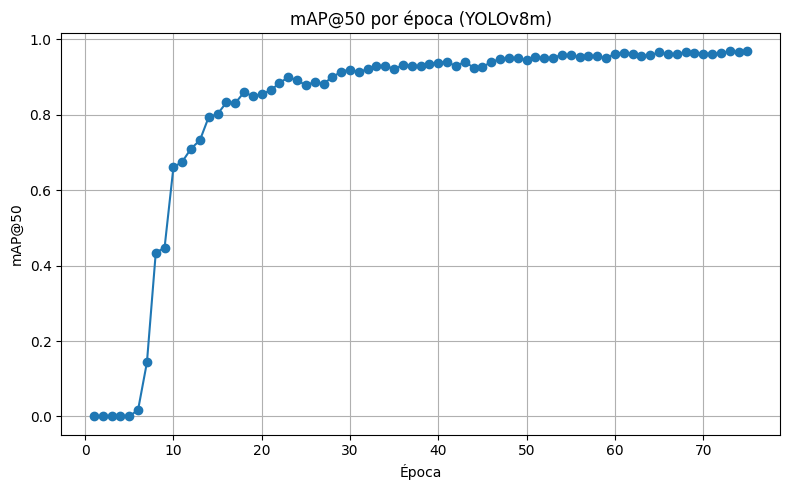

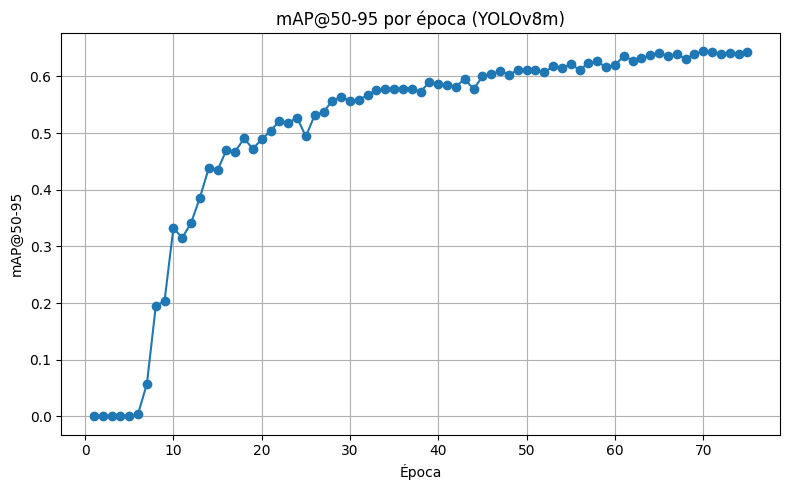

In [ ]:
df = pd.read_csv("comparativa_yolo/yolov8m/results.csv")

# Función para graficar cualquier métrica
def graficar(df, columna, ylabel, titulo, nombre_archivo):
    plt.figure(figsize=(8, 5))
    plt.plot(df['epoch'], df[columna], marker='o', linestyle='-')
    plt.title(titulo)
    plt.xlabel("Época")
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"comparativa_yolo/yolov8m/{nombre_archivo}.png")
    plt.show()

# Graficar cada métrica importante
graficar(df, 'metrics/precision(B)', 'Precisión', 'Precisión por época (YOLOv8m)', 'precision_yolov8m')
graficar(df, 'metrics/recall(B)', 'Recall', 'Recall por época (YOLOv8m)', 'recall_yolov8m')
graficar(df, 'metrics/mAP50(B)', 'mAP@50', 'mAP@50 por época (YOLOv8m)', 'mAP50_yolov8m')
graficar(df, 'metrics/mAP50-95(B)', 'mAP@50-95', 'mAP@50-95 por época (YOLOv8m)', 'mAP50_95_yolov8m')


### CALCULAR TIEMPO DE INFERENCIA MODELO YOLOv8m

In [ ]:
# Cargar el modelo entrenado
yolo_v8m = YOLO("comparativa_yolo/yolov8m/weights/best.pt")

# Ruta al directorio de imágenes de test
test_dir = "dataset/images/test"
image_files = sorted([
    os.path.join(test_dir, f)
    for f in os.listdir(test_dir)
    if f.endswith(".png") or f.endswith(".jpg")
])

N = 1

times = []

for image_path in image_files:
    for _ in range(N):
        start = time.time()
        _ = yolo_v8m.predict(source=image_path, conf=0.4, verbose=False)
        end = time.time()
        times.append(end - start)

# Calcular estadísticas
avg_time = sum(times) / len(times)
fps = 1 / avg_time

print(f"🕒 Tiempo promedio por imagen: {avg_time:.4f} segundos")
print(f"⚡ Velocidad estimada: {fps:.2f} FPS")
print(f"📁 Número total de imágenes procesadas: {len(image_files)}")


🕒 Tiempo promedio por imagen: 0.0358 segundos
⚡ Velocidad estimada: 27.90 FPS
📁 Número total de imágenes procesadas: 40


### EVALUAR MODELO YOLOv8m EN TEST

In [ ]:
# Cargar el modelo entrenado
yolo_v8m = YOLO("comparativa_yolo/yolov8m/weights/best.pt")

# Evaluar rendimiento en test
metrics_yolo_v8m = yolo_v8m.val(data="dataset/data.yaml", split="test")

# Mostrar métricas relevantes
print(f"mAP@0.5: {metrics_yolo_v8m.box.map50:.3f}")
print(f"mAP@0.5:0.95: {metrics_yolo_v8m.box.map:.3f}")
print(f"Precisión: {metrics_yolo_v8m.box.mp:.3f}")
print(f"Recall: {metrics_yolo_v8m.box.mr:.3f}")


Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m summary (fused): 92 layers, 25,842,655 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3450.3±1373.2 MB/s, size: 250.8 KB)


val: Scanning /content/dataset/labels/test.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.54it/s]


                   all         40        244      0.969       0.92      0.969      0.662
                pelota         21         41      0.938      0.951       0.97      0.688
                  bote         22         46          1       0.93      0.972      0.715
               botella         22         46      0.984      0.978      0.991      0.754
                 libro         28         60      0.948      0.917       0.96      0.646
                 pinza         25         51      0.977      0.823      0.953      0.506
Speed: 1.5ms preprocess, 20.2ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to runs/detect/val3
mAP@0.5: 0.969
mAP@0.5:0.95: 0.662
Precisión: 0.969
Recall: 0.920


### VISUALIZAR RESULTADOS MODELO YOLOv8m


image 1/1 /content/dataset/images/test/rgb_100 - copia.png: 480x640 4 botes, 2 botellas, 2 libros, 1 pinza, 29.0ms
Speed: 1.7ms preprocess, 29.0ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)


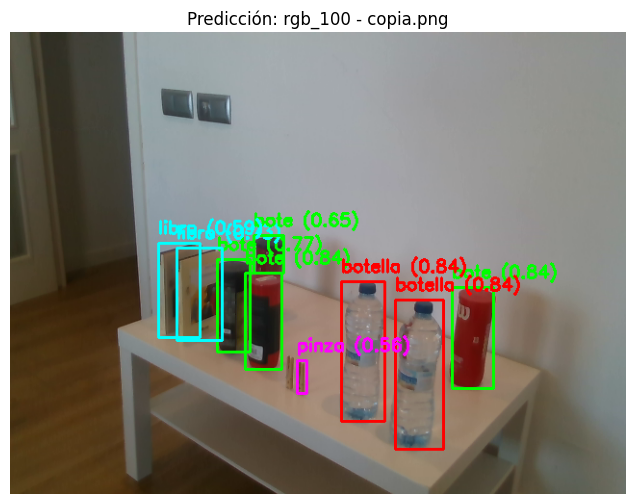


image 1/1 /content/dataset/images/test/rgb_126.png: 480x640 2 pelotas, 2 botes, 1 botella, 2 libros, 27.7ms
Speed: 6.0ms preprocess, 27.7ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)


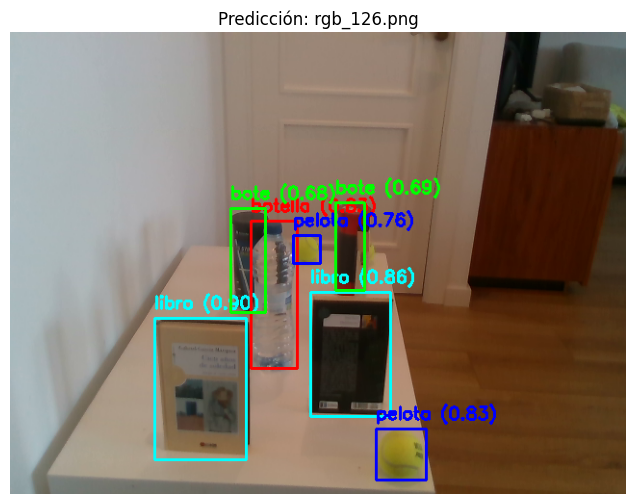


image 1/1 /content/dataset/images/test/rgb_16.png: 480x640 1 pelota, 2 botes, 2 botellas, 2 libros, 2 pinzas, 28.7ms
Speed: 2.2ms preprocess, 28.7ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)


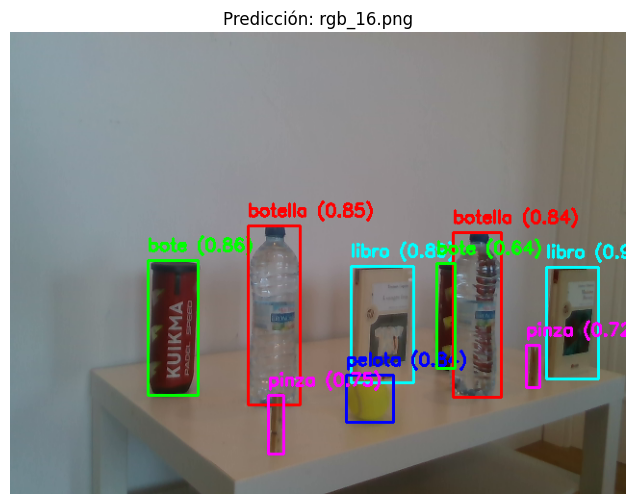


image 1/1 /content/dataset/images/test/rgb_162.png: 480x640 2 pelotas, 2 botes, 2 botellas, 2 pinzas, 29.4ms
Speed: 8.3ms preprocess, 29.4ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)


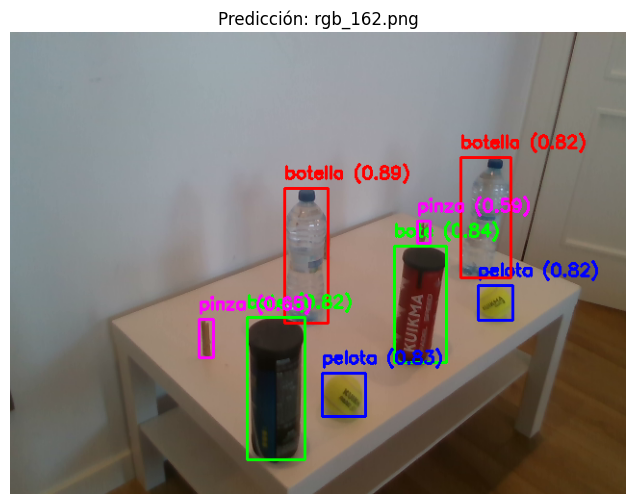


image 1/1 /content/dataset/images/test/rgb_163.png: 480x640 2 pelotas, 2 botes, 2 botellas, 3 pinzas, 27.5ms
Speed: 2.3ms preprocess, 27.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


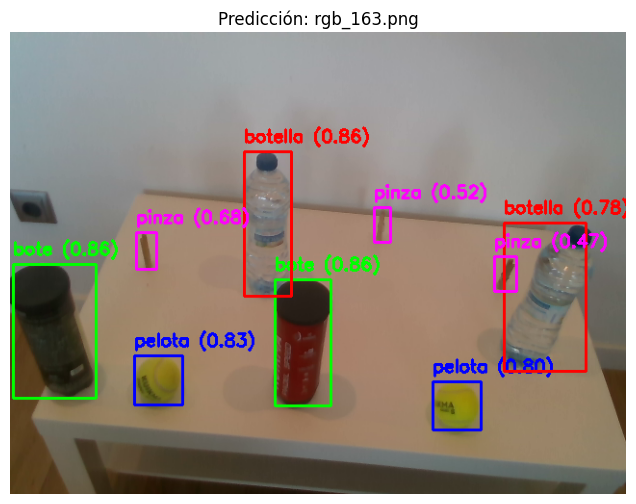

In [ ]:
# Definir colores para cada clase (en BGR para OpenCV)
class_colors = {
    0: (255, 0, 0),    # pelota - azul
    1: (0, 255, 0),    # bote - verde
    2: (0, 0, 255),    # botella - rojo
    3: (255, 255, 0),  # libro - cyan
    4: (255, 0, 255),  # pinza - magenta
}

# Nombres de las clases
class_names = ["pelota", "bote", "botella", "libro", "pinza"]

# Directorio de imágenes de test
test_dir = "dataset/images/test"
image_files = sorted([f for f in os.listdir(test_dir) if f.endswith(".png") or f.endswith(".jpg")])

# Mostrar algunas imágenes con bounding boxes
for file in image_files[:5]:
    path = os.path.join(test_dir, file)
    results = yolo_v8m(path, conf=0.4)[0]

    image = cv2.imread(path)

    for box in results.boxes:
        cls = int(box.cls[0].item())
        conf = box.conf[0].item()
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        color = class_colors.get(cls, (255, 255, 255))
        label = f"{class_names[cls]} ({conf:.2f})"

        # Dibujar caja y texto
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    # Mostrar con matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 6))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title(f"Predicción: {file}")
    plt.show()



# MODELO YOLOv8l

### ENTRENAMIENTO YOLOv8l

In [ ]:
yolo_v8l = YOLO("yolov8l.yaml")

yolo_v8l.train(
    data="dataset/data.yaml",
    epochs=75,
    imgsz=640,
    batch=16,
    project="comparativa_yolo",
    name="yolov8l",
    exist_ok=True
)


Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=75, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8l, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, p

train: Scanning /content/dataset/labels/train.cache... 280 images, 0 backgrounds, 0 corrupt: 100%|██████████| 280/280 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1115.9±1004.5 MB/s, size: 216.0 KB)


val: Scanning /content/dataset/labels/val.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]


Plotting labels to comparativa_yolo/yolov8l/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to comparativa_yolo/yolov8l
Starting training for 75 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/75      9.66G      4.594      4.613      4.209         44        640: 100%|██████████| 18/18 [00:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]

                   all         80        518          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/75      9.93G      3.912      3.477       3.75         97        640: 100%|██████████| 18/18 [00:14<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]

                   all         80        518          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/75      9.79G      3.355      3.015      3.451        104        640: 100%|██████████| 18/18 [00:14<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]

                   all         80        518          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/75      10.3G      2.926      2.687      3.137         66        640: 100%|██████████| 18/18 [00:14<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]

                   all         80        518          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/75      10.3G      2.584        2.4      2.849         89        640: 100%|██████████| 18/18 [00:14<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]

                   all         80        518          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/75      9.94G       2.45      2.216      2.652         82        640: 100%|██████████| 18/18 [00:14<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]

                   all         80        518      0.762     0.0304      0.054     0.0192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/75      10.4G      2.245       1.98      2.471        144        640: 100%|██████████| 18/18 [00:14<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]

                   all         80        518      0.514      0.197      0.203     0.0818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/75      9.85G       2.18      1.855      2.419         86        640: 100%|██████████| 18/18 [00:14<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.90it/s]

                   all         80        518      0.612      0.376      0.429      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/75      10.3G      2.038      1.731      2.279         92        640: 100%|██████████| 18/18 [00:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]

                   all         80        518      0.697      0.522      0.589      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/75      9.93G      1.926      1.629      2.158         88        640: 100%|██████████| 18/18 [00:14<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]

                   all         80        518      0.729      0.601      0.652       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/75      10.3G       1.87       1.52      2.098         77        640: 100%|██████████| 18/18 [00:14<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]

                   all         80        518      0.655      0.642      0.675      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/75      9.88G      1.825      1.499      2.063         91        640: 100%|██████████| 18/18 [00:14<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         80        518      0.787      0.692      0.771      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/75      10.3G       1.81      1.399      1.997         66        640: 100%|██████████| 18/18 [00:14<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]

                   all         80        518      0.831      0.707      0.779       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/75      9.92G      1.716       1.32      1.947         86        640: 100%|██████████| 18/18 [00:14<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         80        518      0.813      0.729      0.813      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/75      10.3G      1.688      1.284      1.893        106        640: 100%|██████████| 18/18 [00:14<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]

                   all         80        518      0.859      0.711      0.804       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/75      9.91G      1.641      1.227      1.838         89        640: 100%|██████████| 18/18 [00:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         80        518      0.838      0.768      0.832       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/75      10.4G      1.619      1.192       1.79        101        640: 100%|██████████| 18/18 [00:14<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all         80        518      0.846      0.778      0.844      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/75      9.92G      1.608       1.17      1.807         68        640: 100%|██████████| 18/18 [00:14<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]

                   all         80        518      0.839      0.699      0.805      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/75      10.1G      1.565      1.126      1.724         78        640: 100%|██████████| 18/18 [00:14<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]

                   all         80        518      0.854      0.766      0.845      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/75      9.94G      1.605      1.142      1.756        108        640: 100%|██████████| 18/18 [00:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]

                   all         80        518      0.837      0.758      0.842      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/75      10.4G      1.568      1.085      1.692         95        640: 100%|██████████| 18/18 [00:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]

                   all         80        518      0.844       0.74      0.824      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/75      9.93G      1.482      1.056      1.681         81        640: 100%|██████████| 18/18 [00:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]

                   all         80        518      0.903      0.808      0.884      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/75      10.3G      1.475      1.022      1.641        117        640: 100%|██████████| 18/18 [00:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         80        518      0.896      0.826      0.889      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/75      9.86G      1.413     0.9815      1.582         90        640: 100%|██████████| 18/18 [00:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         80        518      0.897      0.829      0.906      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/75      10.3G      1.432     0.9836      1.598        128        640: 100%|██████████| 18/18 [00:14<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]

                   all         80        518      0.882      0.838      0.897      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/75      9.86G      1.417     0.9264      1.568        136        640: 100%|██████████| 18/18 [00:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]

                   all         80        518      0.924      0.848      0.912      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/75      10.4G      1.423     0.9649      1.603         85        640: 100%|██████████| 18/18 [00:14<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         80        518      0.911      0.843      0.908      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/75      9.93G      1.351     0.9192      1.551         86        640: 100%|██████████| 18/18 [00:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         80        518      0.862      0.855      0.921      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/75      10.1G      1.382     0.9309       1.56         90        640: 100%|██████████| 18/18 [00:14<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]

                   all         80        518      0.922      0.846      0.907      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/75      9.94G      1.331     0.8703      1.517         84        640: 100%|██████████| 18/18 [00:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]

                   all         80        518      0.914      0.842      0.913       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/75      10.3G      1.369     0.8761      1.527         73        640: 100%|██████████| 18/18 [00:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]

                   all         80        518      0.902      0.868      0.923      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/75      9.86G      1.334     0.8435      1.491         68        640: 100%|██████████| 18/18 [00:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]

                   all         80        518      0.924      0.878      0.929      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/75      9.96G      1.302     0.8227      1.478         90        640: 100%|██████████| 18/18 [00:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]

                   all         80        518      0.906      0.844      0.924      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/75      9.92G      1.308     0.8413      1.483         94        640: 100%|██████████| 18/18 [00:14<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]

                   all         80        518      0.945      0.852      0.929      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/75      10.3G      1.285     0.8109      1.429        101        640: 100%|██████████| 18/18 [00:14<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]

                   all         80        518      0.909      0.885      0.935      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/75      9.88G      1.277     0.8142      1.429         92        640: 100%|██████████| 18/18 [00:14<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]

                   all         80        518      0.952      0.879      0.935      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/75      10.3G      1.238     0.7696      1.419         93        640: 100%|██████████| 18/18 [00:14<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]

                   all         80        518       0.95      0.849      0.927      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/75      9.95G      1.258      0.789      1.401        118        640: 100%|██████████| 18/18 [00:14<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]

                   all         80        518      0.938      0.879      0.939      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/75      10.4G      1.294     0.8014      1.469         64        640: 100%|██████████| 18/18 [00:14<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]

                   all         80        518      0.917      0.877      0.927      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/75      9.91G      1.266     0.7739      1.412        110        640: 100%|██████████| 18/18 [00:14<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]

                   all         80        518      0.917      0.879      0.928      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/75      10.3G      1.252     0.7445      1.384         82        640: 100%|██████████| 18/18 [00:14<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]

                   all         80        518      0.924      0.876      0.929      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/75      9.85G      1.255     0.7638      1.411         85        640: 100%|██████████| 18/18 [00:14<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]

                   all         80        518       0.95      0.867      0.939      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/75      10.4G       1.24     0.7474      1.396         80        640: 100%|██████████| 18/18 [00:14<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]

                   all         80        518      0.953       0.88      0.937      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/75      9.89G      1.237     0.7531      1.392         97        640: 100%|██████████| 18/18 [00:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.99it/s]

                   all         80        518      0.945      0.897      0.949      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/75      10.4G      1.207     0.7278       1.38        122        640: 100%|██████████| 18/18 [00:14<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]

                   all         80        518      0.921      0.896      0.934      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/75      9.86G      1.191     0.7174       1.36         86        640: 100%|██████████| 18/18 [00:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]

                   all         80        518      0.938      0.896      0.943       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/75      10.3G      1.191     0.7067      1.352         90        640: 100%|██████████| 18/18 [00:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]

                   all         80        518      0.927      0.912      0.954      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/75      9.81G      1.175     0.7049      1.369        116        640: 100%|██████████| 18/18 [00:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]

                   all         80        518      0.937      0.876       0.94       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/75      10.3G      1.181     0.6858      1.341         91        640: 100%|██████████| 18/18 [00:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]

                   all         80        518       0.94      0.888      0.947      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/75      9.81G      1.142     0.6911      1.333         90        640: 100%|██████████| 18/18 [00:14<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]

                   all         80        518      0.941      0.894      0.939      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/75      10.1G      1.161     0.6771      1.334        110        640: 100%|██████████| 18/18 [00:14<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]

                   all         80        518      0.939      0.913      0.946      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/75      9.93G      1.162     0.6868      1.323         92        640: 100%|██████████| 18/18 [00:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]

                   all         80        518      0.968      0.883      0.951      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/75      10.3G      1.164     0.6864      1.358         75        640: 100%|██████████| 18/18 [00:13<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]

                   all         80        518      0.956      0.903      0.954      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/75      9.86G      1.148      0.668      1.341         82        640: 100%|██████████| 18/18 [00:14<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]

                   all         80        518      0.949      0.911      0.949      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/75      10.3G      1.144     0.6629      1.322         66        640: 100%|██████████| 18/18 [00:14<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]

                   all         80        518      0.951      0.889      0.948      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/75      9.85G      1.111      0.647      1.301         72        640: 100%|██████████| 18/18 [00:14<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.90it/s]

                   all         80        518       0.95      0.912       0.95      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/75      10.4G      1.137     0.6638      1.316        113        640: 100%|██████████| 18/18 [00:14<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.90it/s]

                   all         80        518       0.96        0.9      0.949      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/75      9.89G      1.125     0.6473      1.307        105        640: 100%|██████████| 18/18 [00:14<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]

                   all         80        518       0.97      0.897      0.956      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/75      10.4G       1.09     0.6295      1.284         65        640: 100%|██████████| 18/18 [00:14<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]

                   all         80        518      0.965      0.901      0.948      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/75      9.93G      1.097     0.6347      1.292         84        640: 100%|██████████| 18/18 [00:14<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all         80        518      0.965      0.898      0.951      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/75      10.1G      1.108     0.6259      1.293         99        640: 100%|██████████| 18/18 [00:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]

                   all         80        518      0.947      0.919      0.957      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/75       9.8G      1.068     0.6099      1.273         96        640: 100%|██████████| 18/18 [00:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]

                   all         80        518      0.959      0.902      0.954      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/75      9.71G      1.063      0.605      1.241         85        640: 100%|██████████| 18/18 [00:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]

                   all         80        518      0.958      0.907       0.96      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/75      9.86G      1.068     0.5981      1.263         84        640: 100%|██████████| 18/18 [00:14<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         80        518      0.946      0.923      0.955      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/75      10.1G      1.071     0.5961      1.273         96        640: 100%|██████████| 18/18 [00:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]

                   all         80        518      0.963      0.912      0.955       0.64


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/75      9.88G      1.031     0.6158      1.292         55        640: 100%|██████████| 18/18 [00:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]

                   all         80        518      0.966      0.899      0.955      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/75        10G      1.038     0.5946      1.289         61        640: 100%|██████████| 18/18 [00:14<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         80        518      0.971      0.894      0.957      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/75      9.88G      1.008     0.5687      1.267         33        640: 100%|██████████| 18/18 [00:13<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]

                   all         80        518      0.972      0.897      0.961      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/75      9.73G      1.006     0.5665      1.238         39        640: 100%|██████████| 18/18 [00:14<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]

                   all         80        518      0.971      0.892      0.958      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/75       9.9G     0.9787     0.5552      1.246         60        640: 100%|██████████| 18/18 [00:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]

                   all         80        518      0.968        0.9      0.962      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/75      10.3G     0.9888     0.5525      1.242         53        640: 100%|██████████| 18/18 [00:13<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]

                   all         80        518      0.969        0.9      0.966      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/75      9.88G     0.9761     0.5457      1.233         42        640: 100%|██████████| 18/18 [00:14<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all         80        518      0.964      0.903      0.959      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/75      10.3G     0.9716     0.5285      1.246         52        640: 100%|██████████| 18/18 [00:14<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.99it/s]

                   all         80        518      0.964      0.913      0.963      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/75      9.88G     0.9685     0.5375      1.255         53        640: 100%|██████████| 18/18 [00:14<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]

                   all         80        518      0.964      0.917      0.959      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/75      10.4G     0.9582     0.5274      1.227         54        640: 100%|██████████| 18/18 [00:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]

                   all         80        518      0.964      0.918      0.962      0.648



75 epochs completed in 0.554 hours.
Optimizer stripped from comparativa_yolo/yolov8l/weights/last.pt, 87.6MB
Optimizer stripped from comparativa_yolo/yolov8l/weights/best.pt, 87.6MB

Validating comparativa_yolo/yolov8l/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8l summary (fused): 112 layers, 43,610,463 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.44it/s]


                   all         80        518      0.963      0.918      0.962      0.648
                pelota         45        111      0.983      0.946      0.993      0.659
                  bote         47        108      0.971      0.944       0.99       0.76
               botella         44         92      0.949      0.935      0.956      0.669
                 libro         48        116       0.97      0.897      0.949      0.675
                 pinza         45         91      0.941      0.869      0.923      0.477
Speed: 0.3ms preprocess, 12.5ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to comparativa_yolo/yolov8l


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79646c424290>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

### GRAFICAR MÉTRICAS YOLOv8l

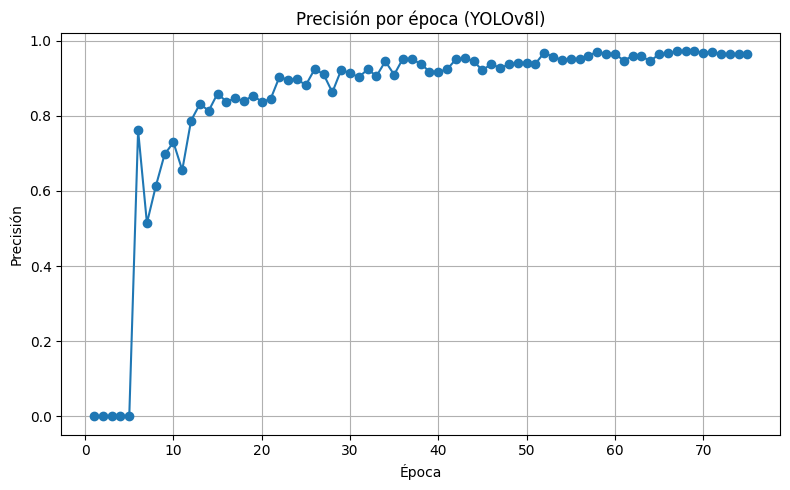

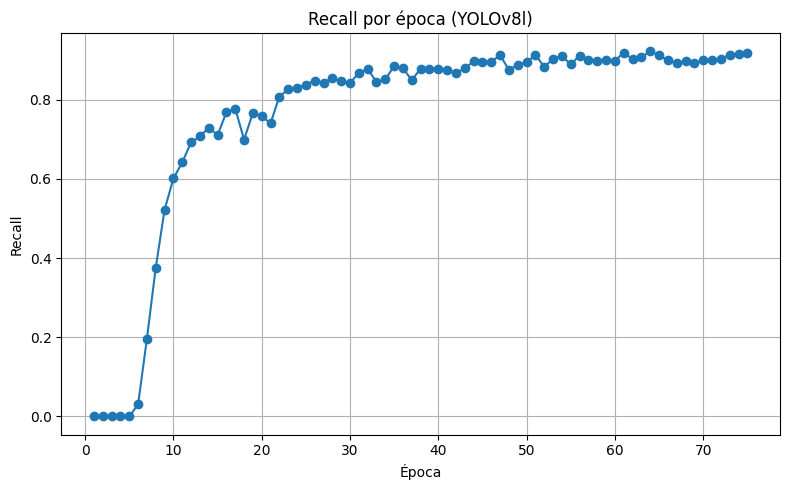

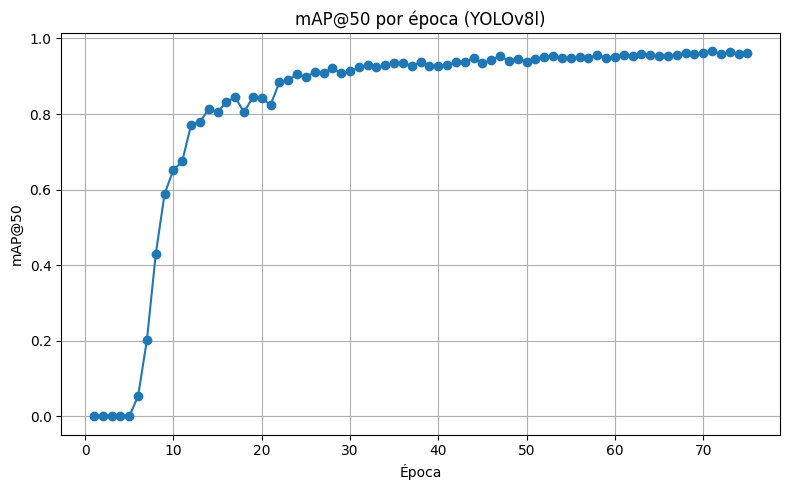

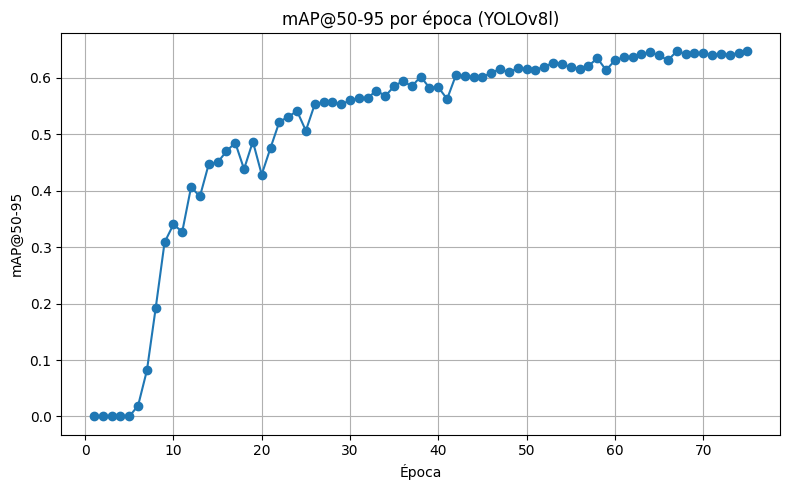

In [ ]:
df = pd.read_csv("comparativa_yolo/yolov8l/results.csv")

# Función para graficar cualquier métrica
def graficar(df, columna, ylabel, titulo, nombre_archivo):
    plt.figure(figsize=(8, 5))
    plt.plot(df['epoch'], df[columna], marker='o', linestyle='-')
    plt.title(titulo)
    plt.xlabel("Época")
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"comparativa_yolo/yolov8l/{nombre_archivo}.png")
    plt.show()

# Graficar cada métrica importante
graficar(df, 'metrics/precision(B)', 'Precisión', 'Precisión por época (YOLOv8l)', 'precision_yolov8l')
graficar(df, 'metrics/recall(B)', 'Recall', 'Recall por época (YOLOv8l)', 'recall_yolov8l')
graficar(df, 'metrics/mAP50(B)', 'mAP@50', 'mAP@50 por época (YOLOv8l)', 'mAP50_yolov8l')
graficar(df, 'metrics/mAP50-95(B)', 'mAP@50-95', 'mAP@50-95 por época (YOLOv8l)', 'mAP50_95_yolov8l')


### CALCULAR TIEMPO DE INFERENCIA MODELO YOLOv8l

In [ ]:
# Cargar el modelo entrenado
yolo_v8l = YOLO("comparativa_yolo/yolov8l/weights/best.pt")

# Ruta al directorio de imágenes de test
test_dir = "dataset/images/test"
image_files = sorted([
    os.path.join(test_dir, f)
    for f in os.listdir(test_dir)
    if f.endswith(".png") or f.endswith(".jpg")
])


N = 1

times = []

for image_path in image_files:
    for _ in range(N):
        start = time.time()
        _ = yolo_v8l.predict(source=image_path, conf=0.4, verbose=False)
        end = time.time()
        times.append(end - start)

# Calcular estadísticas
avg_time = sum(times) / len(times)
fps = 1 / avg_time

print(f"🕒 Tiempo promedio por imagen: {avg_time:.4f} segundos")
print(f"⚡ Velocidad estimada: {fps:.2f} FPS")
print(f"📁 Número total de imágenes procesadas: {len(image_files)}")


🕒 Tiempo promedio por imagen: 0.0552 segundos
⚡ Velocidad estimada: 18.11 FPS
📁 Número total de imágenes procesadas: 40


### EVALUAR MODELO YOLOv8l EN TEST

In [ ]:
# Cargar el modelo entrenado
yolo_v8l = YOLO("comparativa_yolo/yolov8l/weights/best.pt")

# Evaluar rendimiento en test
metrics_yolo_v8l = yolo_v8l.val(data="dataset/data.yaml", split="test")

# Mostrar métricas relevantes
print(f"mAP@0.5: {metrics_yolo_v8l.box.map50:.3f}")
print(f"mAP@0.5:0.95: {metrics_yolo_v8l.box.map:.3f}")
print(f"Precisión: {metrics_yolo_v8l.box.mp:.3f}")
print(f"Recall: {metrics_yolo_v8l.box.mr:.3f}")


Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8l summary (fused): 112 layers, 43,610,463 parameters, 0 gradients, 164.8 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3494.1±983.1 MB/s, size: 250.8 KB)


val: Scanning /content/dataset/labels/test.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


                   all         40        244      0.948      0.936      0.973       0.67
                pelota         21         41      0.929      0.951      0.966      0.707
                  bote         22         46      0.957      0.958      0.976      0.737
               botella         22         46      0.947      0.978      0.992      0.767
                 libro         28         60      0.947       0.85      0.948      0.633
                 pinza         25         51       0.96      0.943      0.984      0.506
Speed: 5.1ms preprocess, 28.9ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/val4
mAP@0.5: 0.973
mAP@0.5:0.95: 0.670
Precisión: 0.948
Recall: 0.936


### VISUALIZAR RESULTADOS MODELO YOLOv8l


image 1/1 /content/dataset/images/test/rgb_100 - copia.png: 480x640 4 botes, 2 botellas, 2 libros, 2 pinzas, 50.9ms
Speed: 1.7ms preprocess, 50.9ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


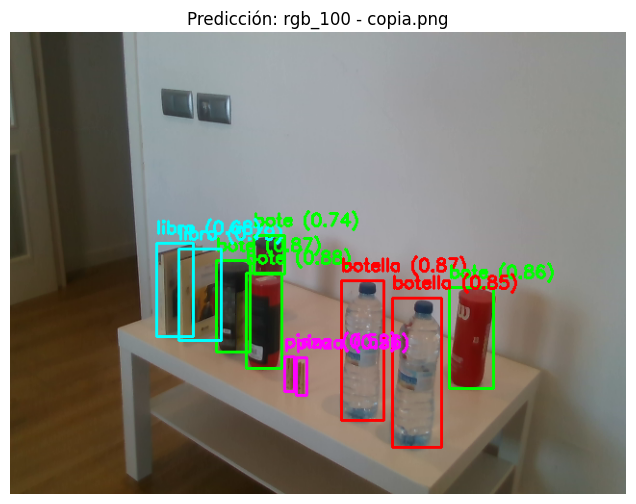


image 1/1 /content/dataset/images/test/rgb_126.png: 480x640 2 pelotas, 2 botes, 1 botella, 2 libros, 37.6ms
Speed: 1.9ms preprocess, 37.6ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


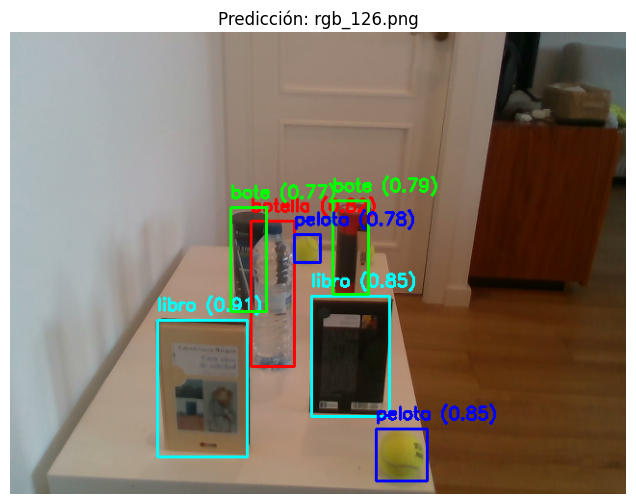


image 1/1 /content/dataset/images/test/rgb_16.png: 480x640 1 pelota, 2 botes, 2 botellas, 2 libros, 2 pinzas, 37.5ms
Speed: 2.1ms preprocess, 37.5ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


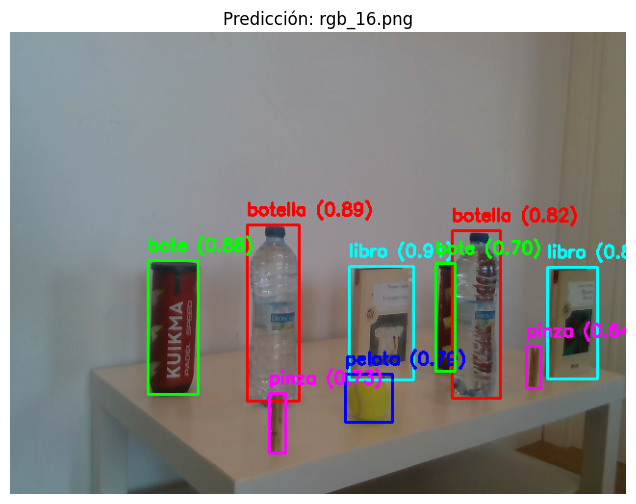


image 1/1 /content/dataset/images/test/rgb_162.png: 480x640 2 pelotas, 2 botes, 2 botellas, 2 pinzas, 37.5ms
Speed: 2.1ms preprocess, 37.5ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


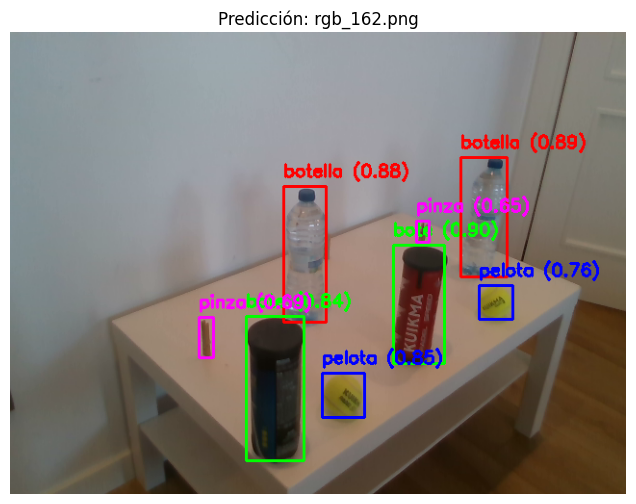


image 1/1 /content/dataset/images/test/rgb_163.png: 480x640 2 pelotas, 3 botes, 2 botellas, 3 pinzas, 37.5ms
Speed: 2.0ms preprocess, 37.5ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


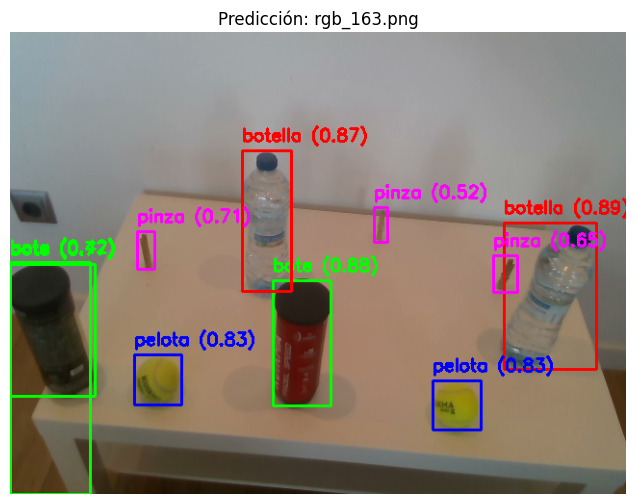

In [ ]:
# Definir colores para cada clase (en BGR para OpenCV)
class_colors = {
    0: (255, 0, 0),    # pelota - azul
    1: (0, 255, 0),    # bote - verde
    2: (0, 0, 255),    # botella - rojo
    3: (255, 255, 0),  # libro - cyan
    4: (255, 0, 255),  # pinza - magenta
}

# Nombres de las clases
class_names = ["pelota", "bote", "botella", "libro", "pinza"]

# Directorio de imágenes de test
test_dir = "dataset/images/test"
image_files = sorted([f for f in os.listdir(test_dir) if f.endswith(".png") or f.endswith(".jpg")])

# Mostrar algunas imágenes con bounding boxes
for file in image_files[:5]:
    path = os.path.join(test_dir, file)
    results = yolo_v8l(path, conf=0.4)[0]

    image = cv2.imread(path)

    for box in results.boxes:
        cls = int(box.cls[0].item())
        conf = box.conf[0].item()
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        color = class_colors.get(cls, (255, 255, 255))
        label = f"{class_names[cls]} ({conf:.2f})"

        # Dibujar caja y texto
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    # Mostrar con matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 6))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title(f"Predicción: {file}")
    plt.show()


# Guardar Modelos YOLO

In [ ]:
from google.colab import files
files.download("comparativa_yolo")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Comparación Modelos YOLO

In [ ]:
from ultralytics import YOLO
import pandas as pd
import os
import time

# Definir los modelos y sus rutas
modelos = {
    "YOLOv8n": "comparativa_yolo/yolov8n/weights/best.pt",
    "YOLOv8s": "comparativa_yolo/yolov8s/weights/best.pt",
    "YOLOv8m": "comparativa_yolo/yolov8m/weights/best.pt",
    "YOLOv8l": "comparativa_yolo/yolov8l/weights/best.pt"
}

# Obtener la lista de imágenes de test
test_dir = "dataset/images/test"
imagenes_test = sorted([
    os.path.join(test_dir, f)
    for f in os.listdir(test_dir)
    if f.lower().endswith((".png", ".jpg", ".jpeg"))
])

# Lista para almacenar los resultados
resultados = []

# Evaluar cada modelo
for nombre, ruta in modelos.items():
    model = YOLO(ruta)
    metrics = model.val(data="dataset/data.yaml", split="test")

    # Medir el tiempo total para todas las imágenes
    tiempos = []
    for img in imagenes_test:
        start = time.time()
        _ = model.predict(source=img, conf=0.4, verbose=False)
        tiempos.append(time.time() - start)

    tiempo_medio = sum(tiempos) / len(tiempos)
    fps = 1 / tiempo_medio

    resultados.append({
        "Modelo": nombre,
        "Precisión media (mp)": metrics.box.mp,
        "Recall medio (mr)": metrics.box.mr,
        "mAP@0.5": metrics.box.map50,
        "mAP@0.5:0.95": metrics.box.map,
        "Velocidad (FPS)": fps
    })

# Crear el DataFrame con los resultados
df_resultados = pd.DataFrame(resultados)
df_resultados.to_csv("comparativa_modelos_yolo.csv", index=False)

print("✅ Comparativa guardada en 'comparativa_modelos_yolo.csv'")
df_resultados


Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2862.2±1039.7 MB/s, size: 253.5 KB)


val: Scanning /content/dataset/labels/test.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]


                   all         40        244      0.928      0.906      0.951      0.628
                pelota         21         41      0.887      0.956      0.964      0.679
                  bote         22         46      0.937      0.913      0.969      0.676
               botella         22         46      0.942      0.957      0.973      0.732
                 libro         28         60      0.979      0.867      0.945      0.597
                 pinza         25         51      0.895      0.838      0.905      0.455
Speed: 5.4ms preprocess, 11.5ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/val7
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3952.7±1037.2 MB/s, size: 255.1 KB)


val: Scanning /content/dataset/labels/test.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]


                   all         40        244       0.95      0.911      0.971       0.65
                pelota         21         41      0.869      0.976      0.969      0.696
                  bote         22         46          1      0.929      0.968      0.722
               botella         22         46      0.945      0.978      0.989      0.727
                 libro         28         60      0.937       0.85      0.954      0.652
                 pinza         25         51          1      0.823      0.973      0.452
Speed: 1.6ms preprocess, 10.2ms inference, 0.0ms loss, 7.1ms postprocess per image
Results saved to runs/detect/val8
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m summary (fused): 92 layers, 25,842,655 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3810.8±1058.6 MB/s, size: 241.7 KB)


val: Scanning /content/dataset/labels/test.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.58it/s]


                   all         40        244      0.969       0.92      0.969      0.662
                pelota         21         41      0.938      0.951       0.97      0.688
                  bote         22         46          1       0.93      0.972      0.715
               botella         22         46      0.984      0.978      0.991      0.754
                 libro         28         60      0.948      0.917       0.96      0.646
                 pinza         25         51      0.977      0.823      0.953      0.506
Speed: 4.6ms preprocess, 20.0ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/val9
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8l summary (fused): 112 layers, 43,610,463 parameters, 0 gradients, 164.8 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4016.3±893.4 MB/s, size: 249.3 KB)


val: Scanning /content/dataset/labels/test.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.23it/s]


                   all         40        244      0.948      0.936      0.973       0.67
                pelota         21         41      0.929      0.951      0.966      0.707
                  bote         22         46      0.957      0.958      0.976      0.737
               botella         22         46      0.947      0.978      0.992      0.767
                 libro         28         60      0.947       0.85      0.948      0.633
                 pinza         25         51       0.96      0.943      0.984      0.506
Speed: 5.2ms preprocess, 33.9ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs/detect/val10
✅ Comparativa guardada en 'comparativa_modelos_yolo.csv'


Modelo  Precisión media (mp)  Recall medio (mr)   mAP@0.5  mAP@0.5:0.95  \
0  YOLOv8n              0.927958           0.905937  0.951384      0.627917   
1  YOLOv8s              0.950206           0.911120  0.970665      0.649727   
2  YOLOv8m              0.969480           0.919921  0.969378      0.661855   
3  YOLOv8l              0.948002           0.936097  0.972961      0.669959   

   Velocidad (FPS)  
0        62.179751  
1        52.225171  
2        35.054154  
3        22.998423